Data description:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;
X23 = amount paid in April, 2005.

# ML models pipeline

## Data Importing - Data cleaning

In [2]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import randint, uniform
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout
from keras.optimizers import Adam, SGD, RMSprop,Adamax
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score


In [3]:
from tensorflow.random import set_seed
from tensorflow.keras.utils import set_random_seed

In [4]:

# Seed value

seed_value= 42

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)
# for later versions:
# session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# tf.compat.v1.keras.backend.set_session(sess)

In [5]:
#Importing data
data = pd.read_excel('default of credit card clients.xls',header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# All datapoints are in integer type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
# No missing values
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
#checking the imbalance of the dataset: 22.12 % --> default
data['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [9]:
'''
Function for some initial preprocessing of the data:
1) replace EDUCATION values 0, 5, 6 with 4 ('other' category) since they are not mentioned in the data description
2) replace MARRIAGE value 0 with 3 ('other' category) as there is not a 0 category for marriage column on data description 
3) drop 'ID' column - useless
4) rename target column to DEFAULT, rename PAY_0 to PAY_1 for consistency and more accurate variable names
'''

def initial_preprocessing(df):
    
    print('EDUCATION values before preprocessing:\n',df['EDUCATION'].value_counts())
    df['EDUCATION'].replace([0,5,6],4,inplace=True)
    print('EDUCATION values after preprocessing:\n',df['EDUCATION'].value_counts())
    print('MARRIAGE values before preprocessing:\n',df['MARRIAGE'].value_counts())
    df['MARRIAGE'].replace(0,3,inplace=True)
    print('MARRIAGE values after preprocessing:\n',df['MARRIAGE'].value_counts())
    df.drop(columns='ID',inplace=True)
    df.rename(columns={"default payment next month": "DEFAULT","PAY_0": "PAY_1"},inplace=True)
    
    return df

    
    

In [10]:
data = initial_preprocessing(data)

EDUCATION values before preprocessing:
 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
EDUCATION values after preprocessing:
 2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
MARRIAGE values before preprocessing:
 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
MARRIAGE values after preprocessing:
 2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


## EDA

In [11]:
#functions for ploting boxplots and histograms of numerical columns - Useful to consider the right scaler 

def plot_boxplots(dataframe):
    num_columns = len(dataframe.columns)
    num_rows = (num_columns + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))

    for i, column in enumerate(dataframe.columns):
        row = i // 2
        col = i % 2
        axes[row, col].boxplot(dataframe[column])
        axes[row, col].set_title(f'Boxplot of {column}')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Values')
        axes[row, col].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
    

def plot_histograms(dataframe):
    num_columns = len(dataframe.columns)
    num_rows = (num_columns + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))

    for i, column in enumerate(dataframe.columns):
        row = i // 2
        col = i % 2
        axes[row, col].hist(dataframe[column])
        axes[row, col].set_title(f'Histogram of {column}')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Frequency')

    # Remove any unused subplots
    if num_columns % 2 != 0:
        fig.delaxes(axes[num_rows-1, 1])

    plt.tight_layout()
    plt.show()

In [12]:
#numerical columns
numerical_cols = ['LIMIT_BAL', 'AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

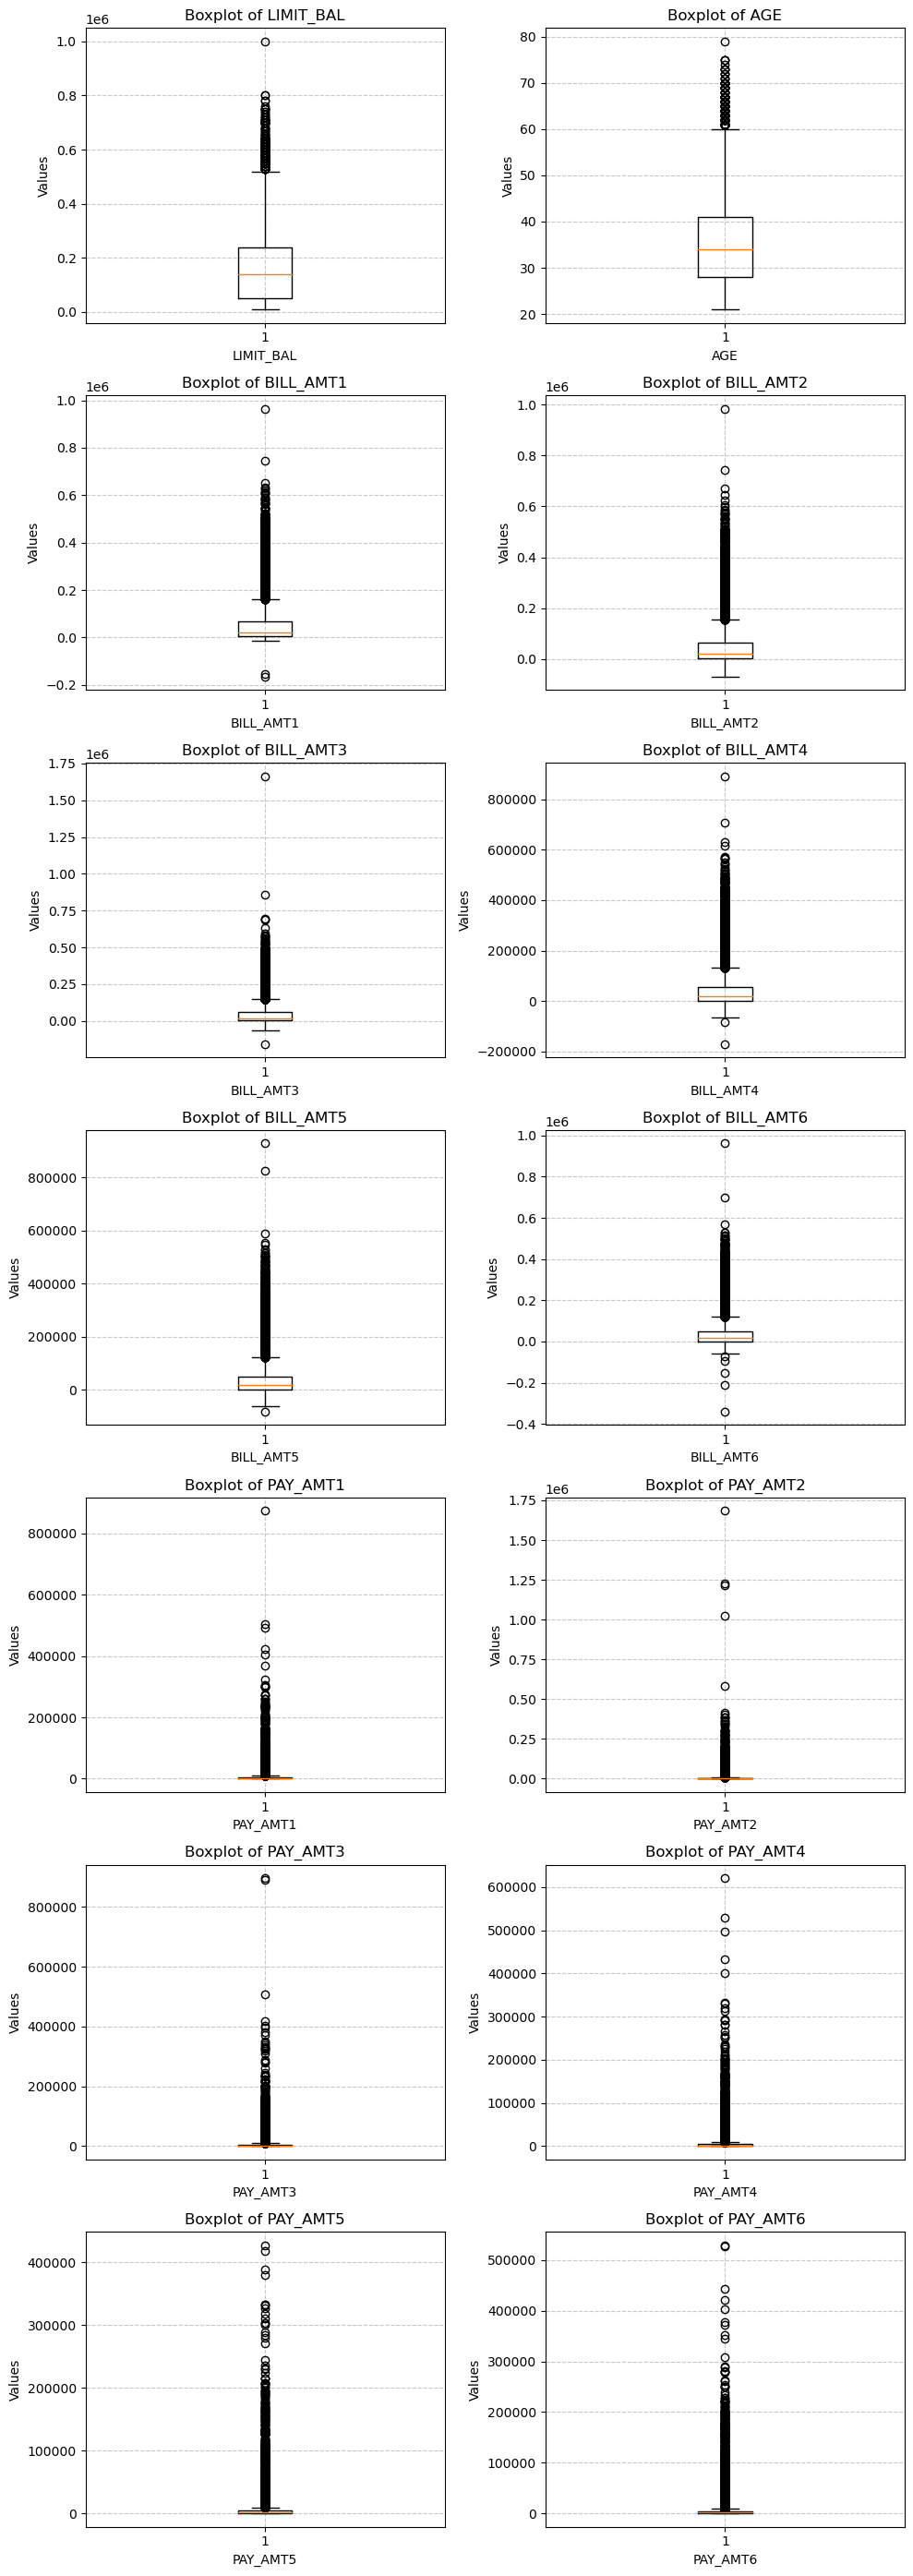

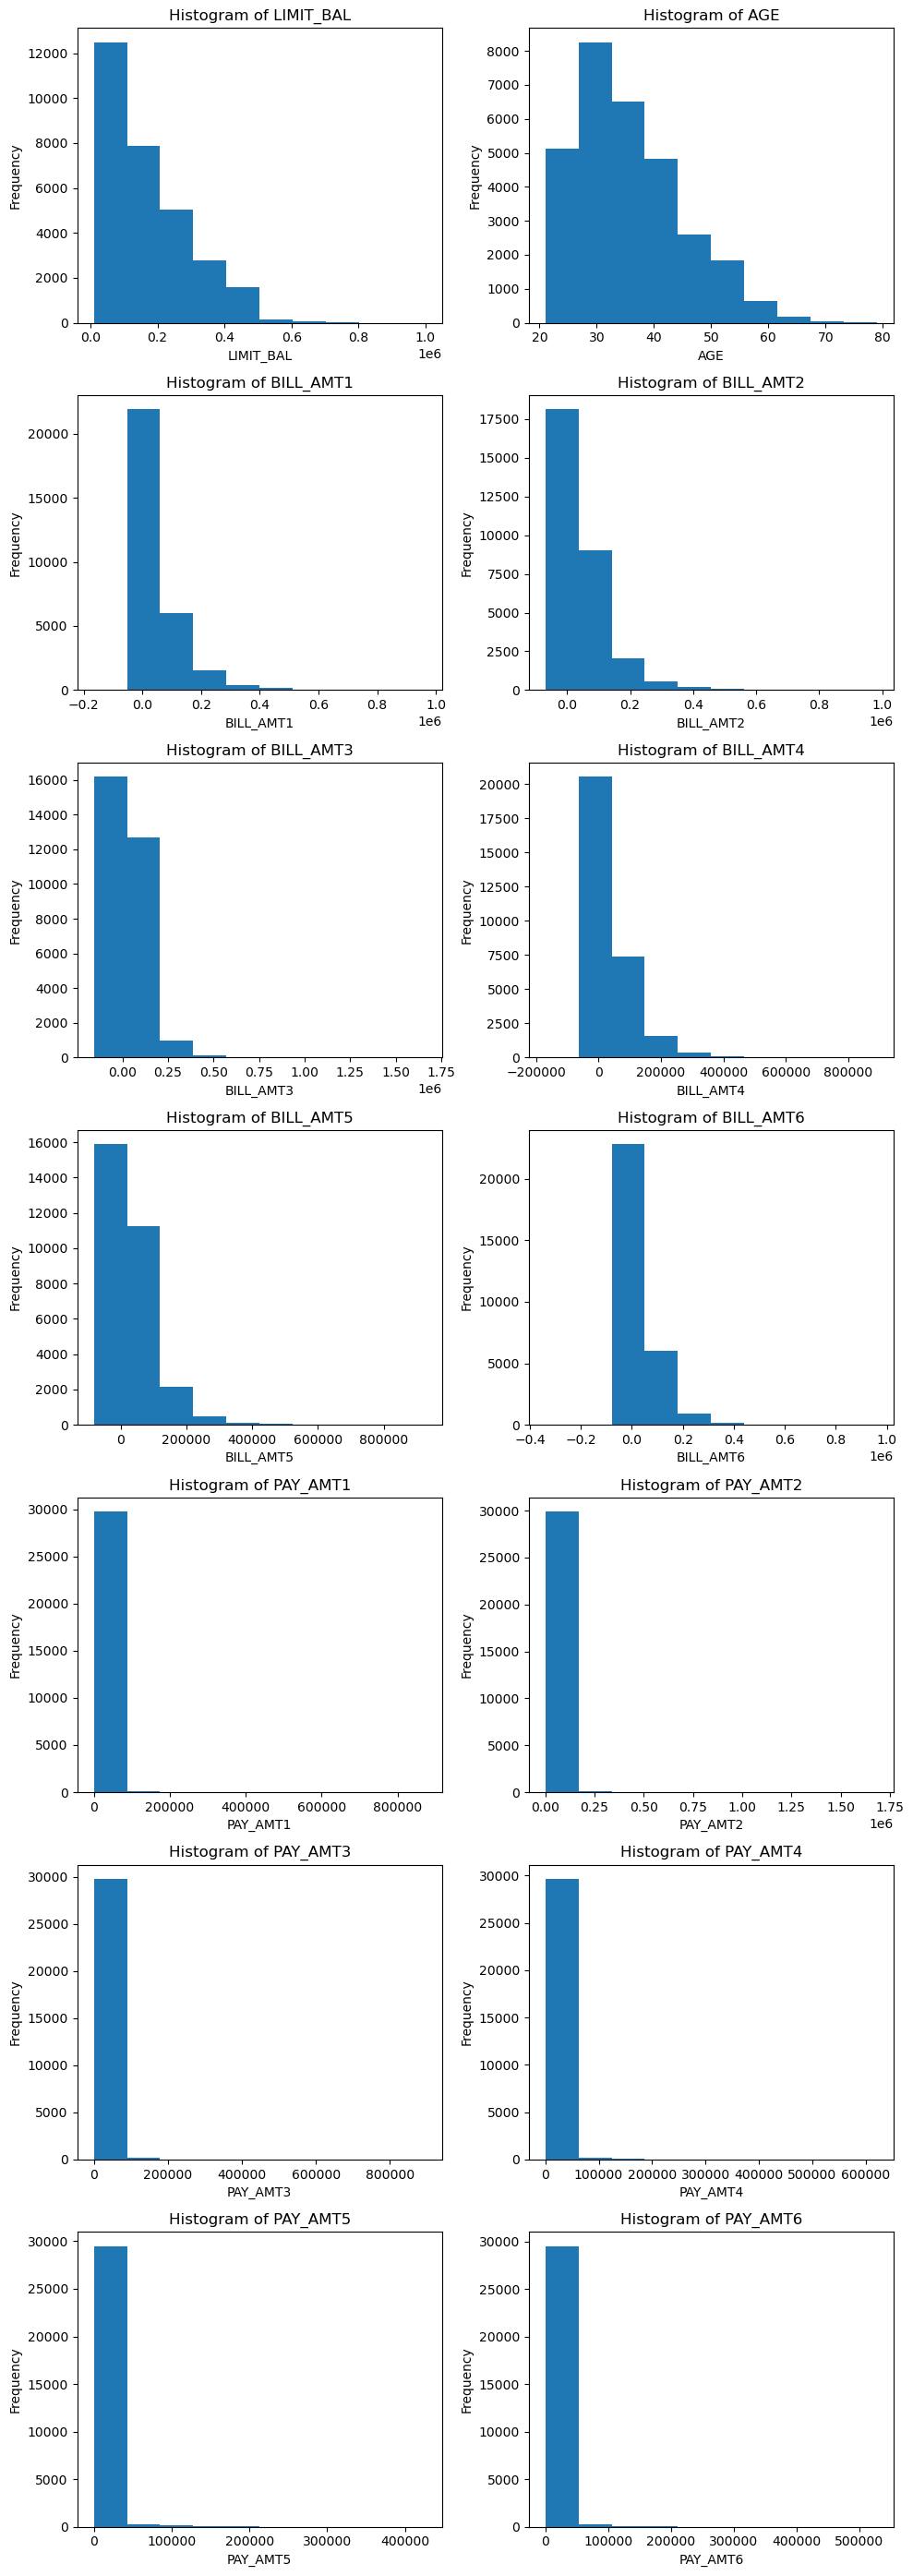

In [13]:
#boxplots and distributions of numerical columns - Due to the presence of outliers and the highly skewed distributions, RobustScaler() will be used 
plot_boxplots(data[numerical_cols])
plot_histograms(data[numerical_cols])

In [13]:
'''
Perform chi-square test to check the predictability of the variables PAY_1 - PAY_6 to the target variable - If it is high, then those categorical variables could one-hot-encoded
The test shows that the predictability is high, so even if after one hot encoding the dimensionality increases a lot, it might be worth it.
EDUCATION and MARRIAGE will be one hot encoded too, in order for the models not to assume any natural ordering.
'''

def chi2_test(data, categorical_vars, target_var):
    chi2_results = {}
    
    for var in categorical_vars:
        contingency_table = pd.crosstab(data[var], data[target_var])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_results[var] = {'chi2': chi2, 'p_value': p_value}
    
    return chi2_results

In [14]:
chi2_test(data,['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],'DEFAULT')

{'PAY_1': {'chi2': 5365.964977413581, 'p_value': 0.0},
 'PAY_2': {'chi2': 3474.4667904168564, 'p_value': 0.0},
 'PAY_3': {'chi2': 2622.4621276828025, 'p_value': 0.0},
 'PAY_4': {'chi2': 2341.469945438205, 'p_value': 0.0},
 'PAY_5': {'chi2': 2197.694900930992, 'p_value': 0.0},
 'PAY_6': {'chi2': 1886.835309001187, 'p_value': 0.0}}

## Pipeline - Cross validation

In [15]:
'''
- train test split (20% test) before scaling and encoding to prevent data leakages 
- train set will be used for cross-validation/hyperparameter tuning and test set for final evaluation 
- Stratify is used to ensure that the proportion of the class labels will be the same as in the input dataset
'''
X_train, X_test, y_train, y_test = train_test_split(data.drop('DEFAULT',axis=1),data['DEFAULT'],test_size=0.2,stratify=data['DEFAULT'],random_state=42)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)

X_train shape: (24000, 23)
X_test shape: (6000, 23)


In [16]:
#Custom transformer for Robust Scaler and One Hot Encoder

class PreprocessorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns,columns_num, drop='first', handle_unknown='ignore',sparse_output=False):
        self.columns = columns
        self.columns_num = columns_num
        self.drop = drop
        self.handle_unknown = handle_unknown
        self.sparse_output = sparse_output
        self.encoders = {}
        self.robust_enc = {}
        

    def fit(self, X, y=None):
        for col in self.columns:
            encoder = OneHotEncoder(drop=self.drop, sparse_output=self.sparse_output, handle_unknown=self.handle_unknown)
            encoder.fit(X[[col]])
            self.encoders[col] = encoder
        
        for col_num in self.columns_num:
            encoder_robust = RobustScaler()
            encoder_robust.fit(X[[col_num]])
            self.robust_enc[col_num] = encoder_robust
            
        return self

    def transform(self, X):
        transformed = X.copy()
        for col in self.columns:
            encoder = self.encoders[col]
            encoded_cols = encoder.transform(transformed[[col]])
            new_cols = [f"{col}_{value}" for value in encoder.categories_[0][1:]]
            encoded_cols_df = pd.DataFrame(encoded_cols, columns=new_cols, index=transformed.index)
            transformed = pd.concat([transformed, encoded_cols_df], axis=1)
        transformed = transformed.drop(self.columns, axis=1)
        
        for col_num in self.columns_num:
            encoder_robust = self.robust_enc[col_num]
            transformed[col_num] = encoder_robust.transform(transformed[[col_num]])
            
        return transformed
        
        

In [17]:
#construct the preprocessor to transform numeric and categorical columns
ohe_cols = ['EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

ohe = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False), ohe_cols)
], remainder='passthrough')

preprocessor = PreprocessorTransformer(columns = ohe_cols, columns_num= numerical_cols,drop='first',handle_unknown='ignore',sparse_output=False)

In [18]:
def run_cross_val(X, y, model, k_folds, sampling = False, scaling = False):
    
    if sampling == False:
        if scaling == False:
            steps = [('ohe',ohe),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Cross validation scores without sampling techniques for {model}:\n')
        else:
            steps = [('preprocessor',preprocessor),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Cross validation scores without sampling techniques for {model}:\n')
        cv = StratifiedKFold(n_splits=k_folds)
    else:
        if scaling == False:
            over = SMOTE()
            steps = [('ohe',ohe),('over',over),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Cross validation scores with sampling techniques on train set for {model}:\n')
        else:
            over = SMOTE()
            steps = [('preprocessor',preprocessor),('over',over),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Cross validation scores with sampling techniques on train set for {model}:\n')
        cv = KFold(n_splits=k_folds) 
        
    scores = cross_validate(pipeline, X, y, scoring=['accuracy','precision','recall','f1','roc_auc'], cv=cv, n_jobs=-1)

    print('Accuracy: %.3f (+/- %.3f)' % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
    print('Precision: %.3f (+/- %.3f)' % (scores['test_precision'].mean(), scores['test_precision'].std()))
    print('Recall: %.3f (+/- %.3f)' % (scores['test_recall'].mean(), scores['test_recall'].std()))
    print('F1 Score: %.3f (+/- %.3f)' % (scores['test_f1'].mean(), scores['test_f1'].std()))
    print('AUC score: %.3f (+/- %.3f)' % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))

In [20]:
run_cross_val(X_train,y_train,model = LogisticRegression(),k_folds=5,sampling=False,scaling=True)
print('')
run_cross_val(X_train,y_train,model = LogisticRegression(),k_folds=5,sampling=True,scaling = True)

Cross validation scores without sampling techniques for LogisticRegression():



Accuracy: 0.821 (+/- 0.002)
Precision: 0.681 (+/- 0.009)
Recall: 0.355 (+/- 0.013)
F1 Score: 0.467 (+/- 0.012)
AUC score: 0.771 (+/- 0.007)

Cross validation scores with sampling techniques on train set for LogisticRegression():

Accuracy: 0.768 (+/- 0.004)
Precision: 0.481 (+/- 0.014)
Recall: 0.592 (+/- 0.011)
F1 Score: 0.531 (+/- 0.009)
AUC score: 0.767 (+/- 0.005)


In [20]:
run_cross_val(X_train,y_train,model = XGBClassifier(),k_folds=5,sampling=False,scaling = False)
print('')
run_cross_val(X_train,y_train,model = XGBClassifier(),k_folds=5,sampling=True, scaling = False)

Cross validation scores without sampling techniques for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...):

Accuracy: 0.813 (+/- 0.002)
Precision: 0.636 (+/- 0.011)
Recall: 0.362 (+/- 0.008)
F1 Score: 0.462 (+/- 0.005)
AUC score: 0.766 (+/- 0.006)

Cross validation scores with sampling techniques 

In [21]:
run_cross_val(X_train,y_train,model = RandomForestClassifier(),k_folds=5, sampling=False, scaling = False)
print('')
run_cross_val(X_train,y_train,model = RandomForestClassifier(),k_folds=5,sampling=True, scaling = False)

Cross validation scores without sampling techniques for RandomForestClassifier():

Accuracy: 0.817 (+/- 0.003)
Precision: 0.652 (+/- 0.009)
Recall: 0.367 (+/- 0.013)
F1 Score: 0.469 (+/- 0.013)
AUC score: 0.767 (+/- 0.003)

Cross validation scores with sampling techniques on train set for RandomForestClassifier():

Accuracy: 0.815 (+/- 0.004)
Precision: 0.632 (+/- 0.009)
Recall: 0.392 (+/- 0.011)
F1 Score: 0.483 (+/- 0.007)
AUC score: 0.765 (+/- 0.004)


In [22]:
run_cross_val(X_train,y_train,model = SVC(),k_folds=5, sampling=False, scaling=True)
print('')
run_cross_val(X_train,y_train,model = SVC(),k_folds=5,sampling=True, scaling =True)

Cross validation scores without sampling techniques for SVC():

Accuracy: 0.818 (+/- 0.001)
Precision: 0.706 (+/- 0.007)
Recall: 0.304 (+/- 0.011)
F1 Score: 0.425 (+/- 0.011)
AUC score: 0.729 (+/- 0.013)

Cross validation scores with sampling techniques on train set for SVC():

Accuracy: 0.767 (+/- 0.006)
Precision: 0.478 (+/- 0.011)
Recall: 0.587 (+/- 0.016)
F1 Score: 0.527 (+/- 0.006)
AUC score: 0.765 (+/- 0.006)


In [23]:
run_cross_val(X_train,y_train,model = GaussianNB(),k_folds=5, sampling=False, scaling=True)
print('')
run_cross_val(X_train,y_train,model = GaussianNB(),k_folds=5,sampling=True, scaling =True)

Cross validation scores without sampling techniques for GaussianNB():

Accuracy: 0.792 (+/- 0.009)
Precision: 0.625 (+/- 0.039)
Recall: 0.143 (+/- 0.072)
F1 Score: 0.226 (+/- 0.088)
AUC score: 0.746 (+/- 0.004)

Cross validation scores with sampling techniques on train set for GaussianNB():

Accuracy: 0.796 (+/- 0.011)
Precision: 0.639 (+/- 0.046)
Recall: 0.183 (+/- 0.101)
F1 Score: 0.272 (+/- 0.107)
AUC score: 0.741 (+/- 0.002)


In [24]:
run_cross_val(X_train,y_train,model = KNeighborsClassifier(),k_folds=5, sampling=False, scaling=True)
print('')
run_cross_val(X_train,y_train,model = KNeighborsClassifier(),k_folds=5,sampling=True, scaling =True)

Cross validation scores without sampling techniques for KNeighborsClassifier():

Accuracy: 0.793 (+/- 0.003)
Precision: 0.552 (+/- 0.012)
Recall: 0.334 (+/- 0.010)
F1 Score: 0.416 (+/- 0.011)
AUC score: 0.698 (+/- 0.010)

Cross validation scores with sampling techniques on train set for KNeighborsClassifier():

Accuracy: 0.655 (+/- 0.005)
Precision: 0.345 (+/- 0.008)
Recall: 0.621 (+/- 0.010)
F1 Score: 0.444 (+/- 0.007)
AUC score: 0.684 (+/- 0.006)


In [25]:
run_cross_val(X_train,y_train,model = DecisionTreeClassifier(),k_folds=5, sampling=False, scaling=False)
print('')
run_cross_val(X_train,y_train,model = DecisionTreeClassifier(),k_folds=5,sampling=True, scaling =False)

Cross validation scores without sampling techniques for DecisionTreeClassifier():

Accuracy: 0.728 (+/- 0.003)
Precision: 0.393 (+/- 0.007)
Recall: 0.423 (+/- 0.016)
F1 Score: 0.407 (+/- 0.011)
AUC score: 0.619 (+/- 0.007)

Cross validation scores with sampling techniques on train set for DecisionTreeClassifier():

Accuracy: 0.722 (+/- 0.006)
Precision: 0.383 (+/- 0.011)
Recall: 0.418 (+/- 0.014)
F1 Score: 0.400 (+/- 0.008)
AUC score: 0.614 (+/- 0.007)


In [26]:
run_cross_val(X_train,y_train,model = MLPClassifier(),k_folds=5, sampling=False, scaling=True)
print('')
run_cross_val(X_train,y_train,model = MLPClassifier(),k_folds=5,sampling=True, scaling =True)

Cross validation scores without sampling techniques for MLPClassifier():

Accuracy: 0.809 (+/- 0.002)
Precision: 0.611 (+/- 0.011)
Recall: 0.373 (+/- 0.011)
F1 Score: 0.463 (+/- 0.007)
AUC score: 0.752 (+/- 0.011)

Cross validation scores with sampling techniques on train set for MLPClassifier():

Accuracy: 0.732 (+/- 0.017)
Precision: 0.422 (+/- 0.028)
Recall: 0.551 (+/- 0.028)
F1 Score: 0.477 (+/- 0.014)
AUC score: 0.719 (+/- 0.009)


## Hyperparameter Tuning

In [47]:
def RandomSearch(X, y, model ,metric, k_folds , param_grid, n_iter, sampling = False, scaling=False):
    
    if sampling == False:
        if scaling == False:
            steps = [('ohe',ohe),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Random search without sampling techniques for {model}:\n')
        else:
            steps = [('preprocessor',preprocessor),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Random search without sampling techniques for {model}:\n')
        cv = StratifiedKFold(n_splits=k_folds)
    else:
        if scaling == False:
            over = SMOTE()
            steps = [('ohe',ohe),('over',over),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Random search with sampling techniques on train set for {model}:\n')
        else:
            over = SMOTE()
            steps = [('preprocessor',preprocessor),('over',over),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Random search with sampling techniques on train set for {model}:\n')
        cv = KFold(n_splits=k_folds) 
       
    rs = RandomizedSearchCV(pipeline, param_grid, cv = cv, n_iter=10, scoring = metric, n_jobs = -1)
    rs.fit(X, y)
    
    print('Best parameters found:', rs.best_params_)
    print('Best score:', rs.best_score_)
    
    return rs.best_params_

In [49]:
LR_grid = {
'model__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'model__penalty' : ['none', 'l1', 'l2', 'elasticnet'],
'model__C' : [10 ** i for i in range(-3, 3)]
}

LR_best_params = RandomSearch(X_train, y_train, LogisticRegression(),metric='f1', k_folds=5,n_iter = 50,  param_grid=LR_grid ,sampling=False, scaling=True)

Random search without sampling techniques for LogisticRegression():



c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\imblearn\pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    s

Best parameters found: {'model__solver': 'newton-cg', 'model__penalty': 'none', 'model__C': 0.5994842503189409}
Best score: 0.4708588740366806


c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [84]:
XGB_grid = {
    'model__learning_rate': uniform(0.01, 0.3),                    
    'model__n_estimators': randint(100, 500),                       
    'model__max_depth': randint(3, 10),                      
    'model__min_child_weight': randint(1, 10),           
    'model__colsample_bytree': uniform(0.8, 0.2),         
    'model__gamma': uniform(0, 0.2),                               
    'model__reg_alpha': uniform(0, 0.5),                          
    'model__reg_lambda': uniform(0.1, 4.9)
    }

XGB_best_params =RandomSearch(X_train, y_train, XGBClassifier(),'f1', k_folds=5, param_grid=XGB_grid,n_iter=50 ,sampling=False, scaling=False)

Random search without sampling techniques for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...):

Best parameters found: {'model__colsample_bytree': 0.9070794558598719, 'model__gamma': 0.10564404232918914, 'model__learning_rate': 0.11459780257389901, 'model__max_depth': 3, 'model__min_child_weight

In [85]:
RF_grid = {
   'model__n_estimators': randint(10, 500),                          
    'model__max_depth': list(np.arange(10, 100, step=10)) + [None],      
    'model__min_samples_split': randint(2, 10),                       
    'model__min_samples_leaf': randint(1, 5),                         
    'model__max_features': ['auto', 'sqrt', 'log2'],                  
    'model__criterion': ['gini', 'entropy'] 
}

RF_best_params = RandomSearch(X_train, y_train, RandomForestClassifier(),'f1', k_folds=5, param_grid=RF_grid ,n_iter=50,sampling=False, scaling=False)

Random search without sampling techniques for RandomForestClassifier():

Best parameters found: {'model__criterion': 'gini', 'model__max_depth': 40, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 7, 'model__n_estimators': 491}
Best score: 0.472197462004151


In [91]:
MLP_grid = {
    'model__hidden_layer_sizes': [(8,),(16,),(32,),(64,),(16, 16),(32,32)],
    'model__learning_rate_init':  [10 ** i for i in range(-5, -2)],
    'model__activation': ['relu', 'tanh'],
    'model__solver': ['adam', 'sgd'], 
    'model__batch_size': [32, 64, 128]
}

MLP_best_params = RandomSearch(X_train, y_train, MLPClassifier(),'f1', k_folds=5, param_grid=MLP_grid ,n_iter = 50,sampling=False, scaling=True)

Random search without sampling techniques for MLPClassifier():



Best parameters found: {'model__solver': 'adam', 'model__learning_rate_init': 0.0001, 'model__hidden_layer_sizes': (64,), 'model__batch_size': 64, 'model__activation': 'relu'}
Best score: 0.47518885364290214


c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [79]:
run_cross_val(X_train,y_train,model = LogisticRegression(solver=LR_best_params['model__solver'],penalty=LR_best_params['model__penalty'], C=LR_best_params['model__C']),k_folds=5,sampling=False, scaling = True)

Cross validation scores without sampling techniques for LogisticRegression(C=0.5994842503189409, penalty='none', solver='newton-cg'):

Accuracy: 0.822 (+/- 0.003)
Precision: 0.684 (+/- 0.011)
Recall: 0.359 (+/- 0.012)
F1 Score: 0.471 (+/- 0.012)
AUC score: 0.770 (+/- 0.007)


In [90]:
run_cross_val(X_train,y_train,model = RandomForestClassifier(n_estimators=RF_best_params['model__n_estimators'], max_depth=RF_best_params['model__max_depth'], min_samples_split=RF_best_params['model__min_samples_split'],
min_samples_leaf=RF_best_params['model__min_samples_leaf'],max_features=RF_best_params['model__max_features'],criterion = RF_best_params['model__criterion']),k_folds=5,sampling=False, scaling = False)

Cross validation scores without sampling techniques for RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=491):



Accuracy: 0.820 (+/- 0.001)
Precision: 0.674 (+/- 0.004)
Recall: 0.362 (+/- 0.010)
F1 Score: 0.471 (+/- 0.009)
AUC score: 0.779 (+/- 0.005)


In [87]:
run_cross_val(X_train,y_train,model = XGBClassifier(n_estimators = XGB_best_params['model__n_estimators'],max_depth = XGB_best_params['model__max_depth'],learning_rate=XGB_best_params['model__learning_rate']
                                                   , reg_alpha = XGB_best_params['model__reg_alpha'],reg_lambda = XGB_best_params['model__reg_lambda'],min_child_weight = XGB_best_params['model__min_child_weight'],
                                                   gamma = XGB_best_params['model__gamma'],colsample_bytree=XGB_best_params['model__colsample_bytree']),k_folds=5,sampling=False,scaling=False)



Cross validation scores without sampling techniques for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9070794558598719, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.10564404232918914, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.11459780257389901, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=469, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...):



Accuracy: 0.820 (+/- 0.002)
Precision: 0.671 (+/- 0.009)
Recall: 0.364 (+/- 0.006)
F1 Score: 0.472 (+/- 0.006)
AUC score: 0.777 (+/- 0.006)


In [92]:
run_cross_val(X_train,y_train,model = MLPClassifier(hidden_layer_sizes=MLP_best_params['model__hidden_layer_sizes'],activation = MLP_best_params['model__activation'], solver=MLP_best_params['model__solver'],learning_rate_init=MLP_best_params['model__learning_rate_init'], batch_size=MLP_best_params['model__batch_size']),k_folds=5,sampling=False, scaling = True)

Cross validation scores without sampling techniques for MLPClassifier(batch_size=64, hidden_layer_sizes=(64,),
              learning_rate_init=0.0001):

Accuracy: 0.821 (+/- 0.002)
Precision: 0.679 (+/- 0.012)
Recall: 0.364 (+/- 0.014)
F1 Score: 0.474 (+/- 0.012)
AUC score: 0.780 (+/- 0.008)


# DL models pipeline

## Hyperparameter Tuning - Temporal features

In [19]:
def preprocess_data(X_train, y_train, X_test, y_test):
    
    cat_cols = ['EDUCATION','MARRIAGE']
    numerical_cols = ['LIMIT_BAL', 'AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5',
                  'BILL_AMT6','PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    
    temp_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
    'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    
    PAY_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_1']
    BILL_AMT_cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
    PAY_AMT_cols = ['PAY_AMT6','PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
    
    enc = PreprocessorTransformer(columns = cat_cols, columns_num= numerical_cols, drop='first',handle_unknown='ignore',sparse_output=False) 
    
    X_train_preprocessed = enc.fit_transform(X_train)
    X_test_preprocessed = enc.transform(X_test)
    
    static_cols_train = X_train_preprocessed.drop(temp_cols,axis=1).columns.to_list()
    static_cols_test = X_test_preprocessed.drop(temp_cols,axis=1).columns.to_list()
    
        
    X_train_temp = X_train_preprocessed[temp_cols]
    X_train_static = X_train_preprocessed[static_cols_train]
    X_test_temp = X_test_preprocessed[temp_cols]
    X_test_static = X_test_preprocessed[static_cols_test]

    PAY_train = X_train_temp[PAY_cols].to_numpy()
    BILL_AMT_train = X_train_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_train = X_train_temp[PAY_AMT_cols].to_numpy()
    
    PAY_test = X_test_temp[PAY_cols].to_numpy()
    BILL_AMT_test = X_test_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_test = X_test_temp[PAY_AMT_cols].to_numpy()   
    
    # Stack temporal features
    stacked_train = np.dstack((PAY_train, BILL_AMT_train, PAY_AMT_train))
    stacked_test = np.dstack((PAY_test, BILL_AMT_test, PAY_AMT_test))
    y_train_preprocessed = y_train.to_numpy()
    y_test_preprocessed = y_test.to_numpy()
    
    return stacked_train, X_train_static, y_train_preprocessed, stacked_test, X_test_static, y_test_preprocessed
    

In [20]:
# 5-fold cross-validation
n_splits = 5 
kf = StratifiedKFold(n_splits=n_splits)

### LSTM 

------------------------------------------------------------------------
Training for fold 1
Epoch 1/55
300/300 [==============================] - 5s 11ms/step - loss: 0.5513 - accuracy: 0.7793 - val_loss: 0.5023 - val_accuracy: 0.7898 - lr: 1.0000e-04
Epoch 2/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4821 - accuracy: 0.7994 - val_loss: 0.4811 - val_accuracy: 0.7919 - lr: 1.0000e-04
Epoch 3/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4681 - accuracy: 0.8001 - val_loss: 0.4750 - val_accuracy: 0.7929 - lr: 1.0000e-04
Epoch 4/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4617 - accuracy: 0.8016 - val_loss: 0.4710 - val_accuracy: 0.7944 - lr: 1.0000e-04
Epoch 5/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4577 - accuracy: 0.8035 - val_loss: 0.4676 - val_accuracy: 0.7973 - lr: 1.0000e-04
Epoch 6/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4548 - accuracy: 0.8046 - val_loss:

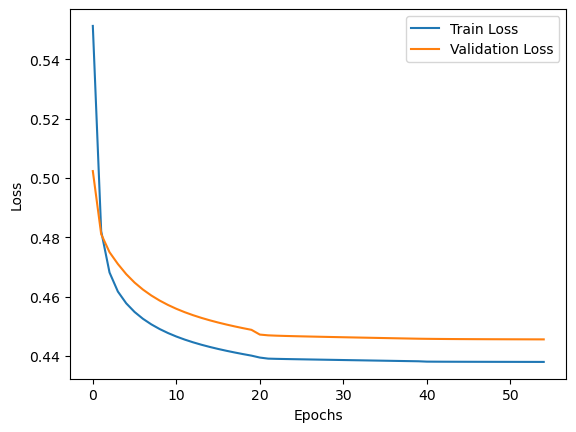

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/55
300/300 [==============================] - 5s 10ms/step - loss: 0.5552 - accuracy: 0.7710 - val_loss: 0.4942 - val_accuracy: 0.8008 - lr: 1.0000e-04
Epoch 2/55
300/300 [==============================] - 2s 8ms/step - loss: 0.4840 - accuracy: 0.7974 - val_loss: 0.4687 - val_accuracy: 0.7998 - lr: 1.0000e-04
Epoch 3/55
300/300 [==============================] - 3s 10ms/step - loss: 0.4697 - accuracy: 0.7994 - val_loss: 0.4590 - val_accuracy: 0.8025 - lr: 1.0000e-04
Epoch 4/55
300/300 [==============================] - 2s 8ms/step - loss: 0.4638 - accuracy: 0.8004 - val_loss: 0.4541 - val_accuracy: 0.8054 - lr: 1.0000e-04
Epoch 5/55
300/300 [==============================] - 2s 8ms/step - loss: 0.4601 - accuracy: 0.8021 - val_loss: 0.4509 - val_accuracy: 0.8054 - lr: 1.0000e-04
Epoch 6/55
300/300 [==============================] - 2

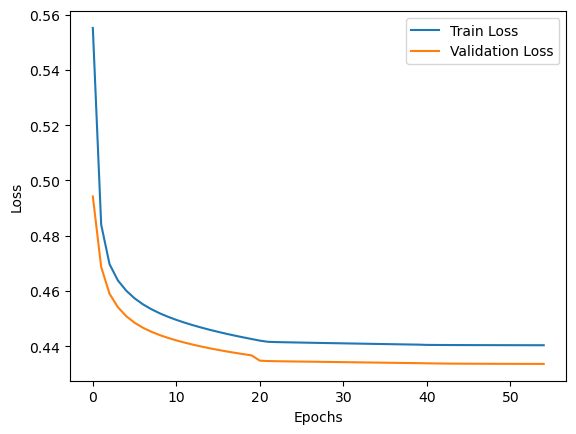

150/150 [==============================] - 1s 3ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/55
300/300 [==============================] - 6s 11ms/step - loss: 0.5429 - accuracy: 0.7745 - val_loss: 0.4955 - val_accuracy: 0.8000 - lr: 1.0000e-04
Epoch 2/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4815 - accuracy: 0.7976 - val_loss: 0.4701 - val_accuracy: 0.8027 - lr: 1.0000e-04
Epoch 3/55
300/300 [==============================] - 4s 12ms/step - loss: 0.4665 - accuracy: 0.7989 - val_loss: 0.4628 - val_accuracy: 0.8033 - lr: 1.0000e-04
Epoch 4/55
300/300 [==============================] - 4s 13ms/step - loss: 0.4610 - accuracy: 0.8005 - val_loss: 0.4590 - val_accuracy: 0.8040 - lr: 1.0000e-04
Epoch 5/55
300/300 [==============================] - 4s 13ms/step - loss: 0.4575 - accuracy: 0.8022 - val_loss: 0.4562 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 6/55
300/300 [==============================] -

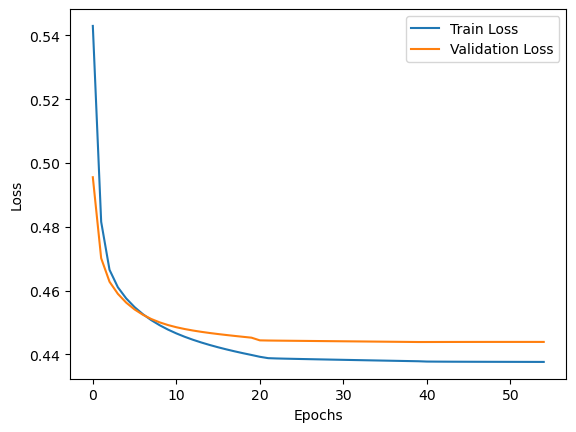

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/55
300/300 [==============================] - 5s 11ms/step - loss: 0.5530 - accuracy: 0.7663 - val_loss: 0.5000 - val_accuracy: 0.7925 - lr: 1.0000e-04
Epoch 2/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4841 - accuracy: 0.7973 - val_loss: 0.4742 - val_accuracy: 0.8002 - lr: 1.0000e-04
Epoch 3/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4692 - accuracy: 0.7983 - val_loss: 0.4651 - val_accuracy: 0.8017 - lr: 1.0000e-04
Epoch 4/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4631 - accuracy: 0.8003 - val_loss: 0.4606 - val_accuracy: 0.8046 - lr: 1.0000e-04
Epoch 5/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4594 - accuracy: 0.8006 - val_loss: 0.4578 - val_accuracy: 0.8037 - lr: 1.0000e-04
Epoch 6/55
300/300 [==============================] - 3s

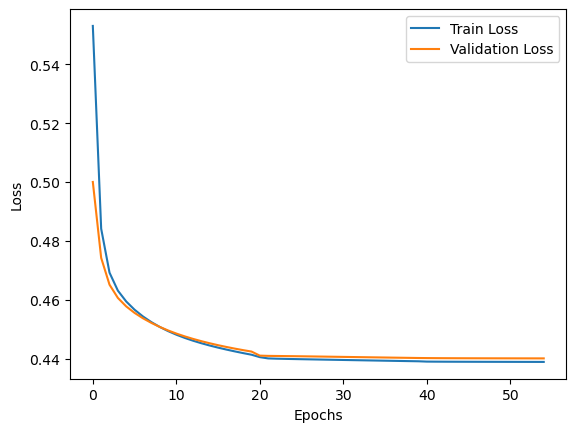

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/55
300/300 [==============================] - 5s 11ms/step - loss: 0.5510 - accuracy: 0.7751 - val_loss: 0.4971 - val_accuracy: 0.7940 - lr: 1.0000e-04
Epoch 2/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4832 - accuracy: 0.7984 - val_loss: 0.4727 - val_accuracy: 0.7981 - lr: 1.0000e-04
Epoch 3/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4680 - accuracy: 0.7997 - val_loss: 0.4641 - val_accuracy: 0.7985 - lr: 1.0000e-04
Epoch 4/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4620 - accuracy: 0.8006 - val_loss: 0.4603 - val_accuracy: 0.8004 - lr: 1.0000e-04
Epoch 5/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4585 - accuracy: 0.8022 - val_loss: 0.4577 - val_accuracy: 0.8006 - lr: 1.0000e-04
Epoch 6/55
300/300 [==============================] - 3s

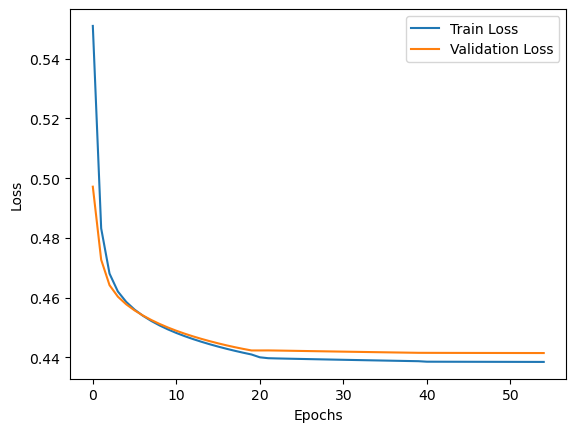

150/150 [==============================] - 1s 3ms/step
Accuracy: 0.813 (+/- 0.003)
Precision: 0.645 (+/- 0.010)
Recall: 0.340 (+/- 0.015)
F1 score: 0.445 (+/- 0.015)
AUC score: 0.643 (+/- 0.007)


In [52]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
AUC_scores = []

fold_no = 1
for train_index, test_index in kf.split(X_train, y_train):
    X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]
    
    stacked_train, X_train_static, y_train_dl, stacked_test, X_test_static, y_test_dl = preprocess_data(X_train_dl,y_train_dl, X_test_dl, y_test_dl)


    # Build and compile LSTM model
    num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(128,return_sequences=True, input_shape=(num_time_steps, num_features)))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    initial_learning_rate = 0.0001  # Initial learning rate
    decay_rate = 0.1  # Decay rate
    decay_steps = 20  # Decay steps (number of steps before applying decay)
    epochs = 55

    def learning_rate_scheduler(epoch):
        return initial_learning_rate * decay_rate ** (epoch // decay_steps)
    
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])
    
    lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no}')
 
    # Train the model
    batch_size = 64
    
    # Train the model
    history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
    
    # Plot the loss on train vs validate tests
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    y_pred_probs = model.predict(stacked_test)
    y_pred = (y_pred_probs>=0.5).astype(int)    
    
    accuracy =  accuracy_score(y_test_dl,y_pred)
    precision = precision_score(y_test_dl,y_pred)
    recall = recall_score(y_test_dl,y_pred)
    f1 =  f1_score(y_test_dl,y_pred)
    AUC = roc_auc_score(y_test_dl,y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    AUC_scores.append(AUC)
    
    fold_no = fold_no + 1


# Calculate the average and standard deviation of the evaluation metrics
print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))

### LSTM Tuning architectures

In [27]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 6, 256)            266240    
                                                                 
 flatten_12 (Flatten)        (None, 1536)              0         
                                                                 
 dense_12 (Dense)            (None, 1)                 1537      
                                                                 
Total params: 267,777
Trainable params: 267,777
Non-trainable params: 0
_________________________________________________________________


------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
600/600 [==============================] - 19s 26ms/step - loss: 0.5280 - accuracy: 0.7862 - val_loss: 0.4870 - val_accuracy: 0.7925 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 14s 23ms/step - loss: 0.4727 - accuracy: 0.7987 - val_loss: 0.4757 - val_accuracy: 0.7929 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 14s 23ms/step - loss: 0.4630 - accuracy: 0.8008 - val_loss: 0.4697 - val_accuracy: 0.7944 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 16s 26ms/step - loss: 0.4579 - accuracy: 0.8022 - val_loss: 0.4654 - val_accuracy: 0.7956 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 15s 25ms/step - loss: 0.4545 - accuracy: 0.8027 - val_loss: 0.4624 - val_accuracy: 0.7960 - lr: 1.0000e-04
Epoch 6/50
600/600 [==============================] - 14s 24ms/step - loss: 0.4519 - accuracy: 0.8041 

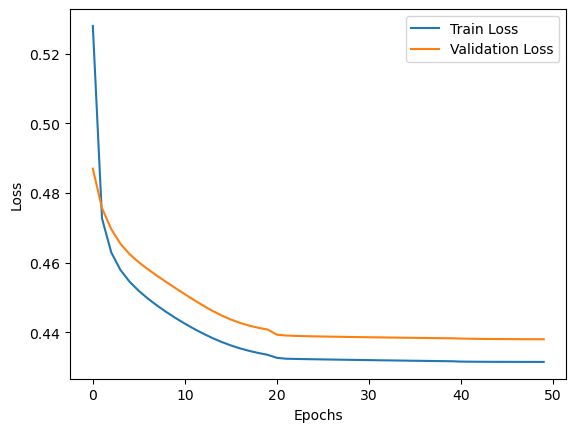

150/150 [==============================] - 2s 10ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
600/600 [==============================] - 17s 24ms/step - loss: 0.5202 - accuracy: 0.7916 - val_loss: 0.4781 - val_accuracy: 0.7975 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 14s 23ms/step - loss: 0.4762 - accuracy: 0.7969 - val_loss: 0.4658 - val_accuracy: 0.7994 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 13s 21ms/step - loss: 0.4688 - accuracy: 0.7982 - val_loss: 0.4596 - val_accuracy: 0.8010 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 13s 21ms/step - loss: 0.4643 - accuracy: 0.7994 - val_loss: 0.4553 - val_accuracy: 0.8042 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 13s 22ms/step - loss: 0.4610 - accuracy: 0.7998 - val_loss: 0.4522 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 6/50
600/600 [==========================

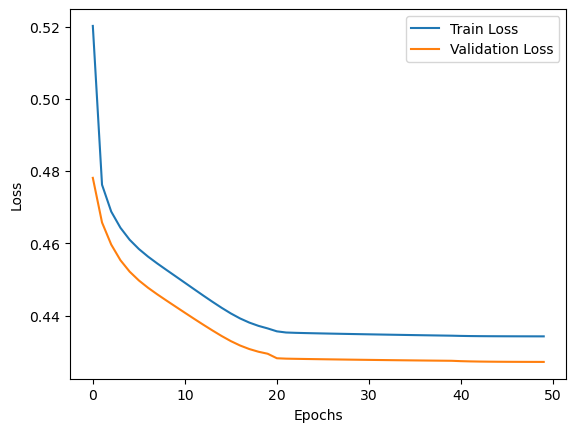

150/150 [==============================] - 3s 12ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
600/600 [==============================] - 21s 30ms/step - loss: 0.5283 - accuracy: 0.7824 - val_loss: 0.4825 - val_accuracy: 0.7975 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 16s 27ms/step - loss: 0.4764 - accuracy: 0.7958 - val_loss: 0.4691 - val_accuracy: 0.7994 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 16s 26ms/step - loss: 0.4668 - accuracy: 0.7978 - val_loss: 0.4628 - val_accuracy: 0.8025 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 16s 26ms/step - loss: 0.4612 - accuracy: 0.7997 - val_loss: 0.4583 - val_accuracy: 0.8023 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 16s 27ms/step - loss: 0.4571 - accuracy: 0.8012 - val_loss: 0.4550 - val_accuracy: 0.8048 - lr: 1.0000e-04
Epoch 6/50
600/600 [==========================

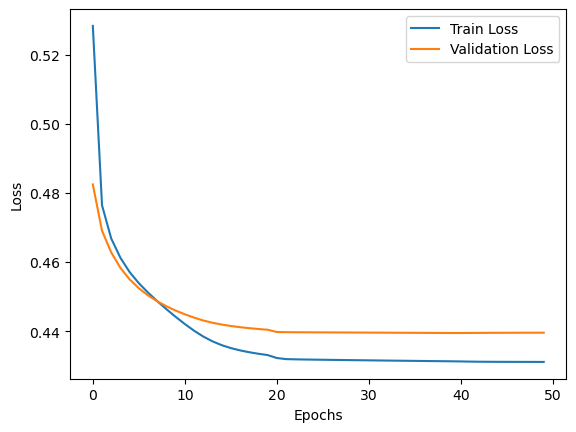

150/150 [==============================] - 3s 12ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
600/600 [==============================] - 20s 27ms/step - loss: 0.5250 - accuracy: 0.7935 - val_loss: 0.4811 - val_accuracy: 0.7967 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 16s 27ms/step - loss: 0.4750 - accuracy: 0.7969 - val_loss: 0.4680 - val_accuracy: 0.8002 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 15s 26ms/step - loss: 0.4668 - accuracy: 0.7989 - val_loss: 0.4622 - val_accuracy: 0.8031 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 14s 24ms/step - loss: 0.4614 - accuracy: 0.8004 - val_loss: 0.4585 - val_accuracy: 0.8021 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 14s 24ms/step - loss: 0.4575 - accuracy: 0.8012 - val_loss: 0.4559 - val_accuracy: 0.8027 - lr: 1.0000e-04
Epoch 6/50
600/600 [==========================

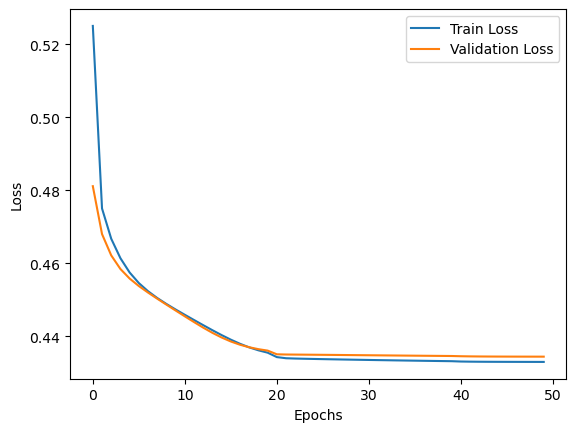

150/150 [==============================] - 2s 9ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
600/600 [==============================] - 16s 23ms/step - loss: 0.5239 - accuracy: 0.7944 - val_loss: 0.4818 - val_accuracy: 0.7979 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 13s 21ms/step - loss: 0.4754 - accuracy: 0.7969 - val_loss: 0.4694 - val_accuracy: 0.8008 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 13s 22ms/step - loss: 0.4666 - accuracy: 0.7983 - val_loss: 0.4639 - val_accuracy: 0.8027 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 13s 22ms/step - loss: 0.4612 - accuracy: 0.8005 - val_loss: 0.4604 - val_accuracy: 0.8027 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 13s 21ms/step - loss: 0.4573 - accuracy: 0.8023 - val_loss: 0.4577 - val_accuracy: 0.8019 - lr: 1.0000e-04
Epoch 6/50
600/600 [===========================

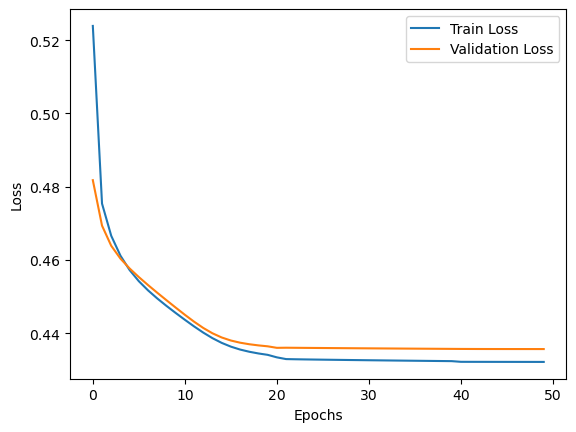

150/150 [==============================] - 3s 13ms/step
Architecture: {'hidden_layers': 2, 'units_per_layer': 64}
Accuracy: 0.820 (+/- 0.002)
Precision: 0.659 (+/- 0.010)
Recall: 0.383 (+/- 0.010)
F1 score: 0.484 (+/- 0.008)
AUC score: 0.663 (+/- 0.004)

Best Architecture:
{'hidden_layers': 2, 'units_per_layer': 64}
Best F1 Score: 0.4843156989462418


In [36]:
architectures = [
    {'hidden_layers': 2, 'units_per_layer': 64}
]

best_architecture = None
best_f1_score = 0.0

for architecture in architectures:
    fold_no = 1
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    AUC_scores = []
    
    for train_index, test_index in kf.split(X_train, y_train):
        
        X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

        stacked_train, X_train_static, y_train_dl, stacked_test, X_test_static, y_test_dl = preprocess_data(X_train_dl,y_train_dl, X_test_dl, y_test_dl)
        
        # Build and compile LSTM model
        num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]
        
        # Define the LSTM model
        model = Sequential()
        model.add(LSTM(architecture['units_per_layer'], return_sequences=True, input_shape=(num_time_steps, num_features)))
        for _ in range(1, architecture['hidden_layers']):
            model.add(LSTM(architecture['units_per_layer'], return_sequences=True))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        
        initial_learning_rate = 0.0001  # Initial learning rate
        decay_rate = 0.1  # Decay rate
        decay_steps = 20  # Decay steps (number of steps before applying decay)
        epochs = 50

        def learning_rate_scheduler(epoch):
            return initial_learning_rate * decay_rate ** (epoch // decay_steps)
        
        
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])
        
        lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
        
        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no}')
    
        # Train the model
        batch_size = 32
        
        # Train the model
        history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
        
        # Plot the loss on train vs validate tests
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        y_pred_probs = model.predict(stacked_test)
        y_pred = (y_pred_probs>=0.5).astype(int)    
        
        accuracy =  accuracy_score(y_test_dl,y_pred)
        precision = precision_score(y_test_dl,y_pred)
        recall = recall_score(y_test_dl,y_pred)
        f1 =  f1_score(y_test_dl,y_pred)
        AUC = roc_auc_score(y_test_dl,y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        AUC_scores.append(AUC)
        
        fold_no = fold_no + 1
        
    # Calculate the average F1 score for the current architecture
    average_f1_score = np.mean(f1_scores)

    # Print the scores for the current architecture
    print(f"Architecture: {architecture}")
    print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
    print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
    print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
    print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
    print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))
    print()
    
    # Check if the current architecture has a higher average F1 score
    # If so, update the best architecture and best F1 score
    if average_f1_score > best_f1_score:
        best_architecture = architecture
        best_f1_score = average_f1_score


# Print the best architecture
print("Best Architecture:")
print(best_architecture)
print("Best F1 Score:", best_f1_score)

In [23]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 6, 64)             33024     
                                                                 
 lstm_2 (LSTM)               (None, 6, 64)             33024     
                                                                 
 flatten_10 (Flatten)        (None, 384)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 385       
                                                                 
Total params: 83,841
Trainable params: 83,841
Non-trainable params: 0
_________________________________________________________________


### LSTM Tuning optimizer, lr, bs

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
600/600 [==============================] - 13s 17ms/step - loss: 0.5375 - accuracy: 0.7760 - val_loss: 0.4981 - val_accuracy: 0.7794 - lr: 0.0100
Epoch 2/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4888 - accuracy: 0.7837 - val_loss: 0.4883 - val_accuracy: 0.7879 - lr: 0.0100
Epoch 3/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4821 - accuracy: 0.7945 - val_loss: 0.4861 - val_accuracy: 0.7908 - lr: 0.0100
Epoch 4/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4797 - accuracy: 0.7974 - val_loss: 0.4846 - val_accuracy: 0.7910 - lr: 0.0100
Epoch 5/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4777 - accuracy: 0.7987 - val_loss: 0.4830 - val_accuracy: 0.7921 - lr: 0.0100
Epoch 6/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4757 - accuracy: 0.7998 - val_loss: 0.4813 - val_

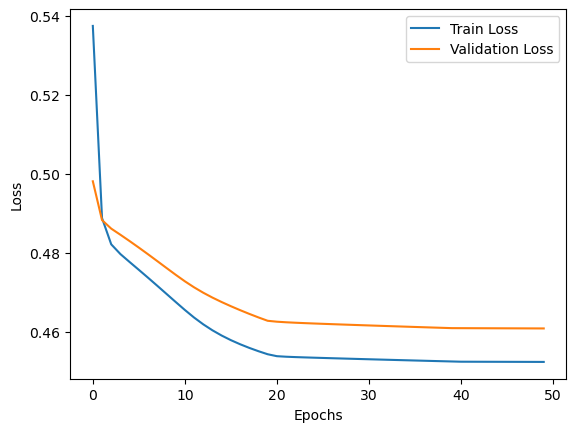

150/150 [==============================] - 2s 6ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
600/600 [==============================] - 11s 15ms/step - loss: 0.5409 - accuracy: 0.7730 - val_loss: 0.4978 - val_accuracy: 0.7802 - lr: 0.0100
Epoch 2/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4919 - accuracy: 0.7817 - val_loss: 0.4828 - val_accuracy: 0.7912 - lr: 0.0100
Epoch 3/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4842 - accuracy: 0.7924 - val_loss: 0.4781 - val_accuracy: 0.7952 - lr: 0.0100
Epoch 4/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4815 - accuracy: 0.7962 - val_loss: 0.4756 - val_accuracy: 0.7958 - lr: 0.0100
Epoch 5/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4794 - accuracy: 0.7972 - val_loss: 0.4734 - val_accuracy: 0.7971 - lr: 0.0100
Epoch 6/50
600/600 [==============================] - 8s 13ms/step - lo

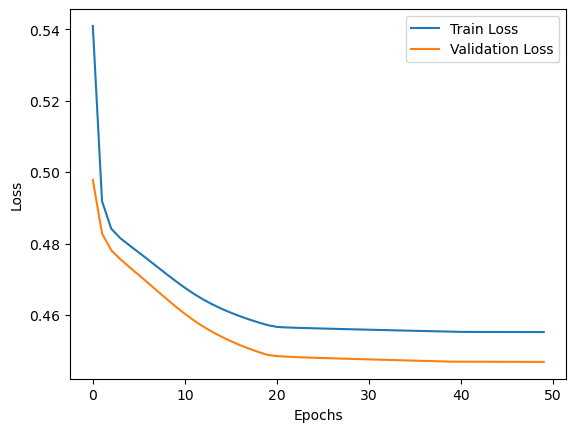

150/150 [==============================] - 3s 8ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
600/600 [==============================] - 13s 17ms/step - loss: 0.5330 - accuracy: 0.7754 - val_loss: 0.4928 - val_accuracy: 0.7802 - lr: 0.0100
Epoch 2/50
600/600 [==============================] - 9s 15ms/step - loss: 0.4877 - accuracy: 0.7866 - val_loss: 0.4832 - val_accuracy: 0.7962 - lr: 0.0100
Epoch 3/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4829 - accuracy: 0.7933 - val_loss: 0.4804 - val_accuracy: 0.7996 - lr: 0.0100
Epoch 4/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4809 - accuracy: 0.7949 - val_loss: 0.4785 - val_accuracy: 0.8017 - lr: 0.0100
Epoch 5/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4791 - accuracy: 0.7956 - val_loss: 0.4767 - val_accuracy: 0.8019 - lr: 0.0100
Epoch 6/50
600/600 [==============================] - 9s 15ms/step - lo

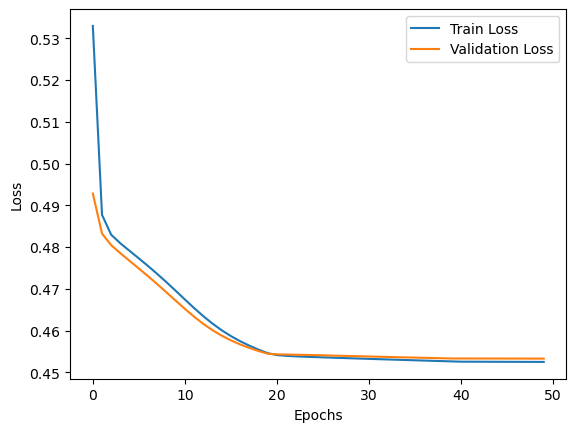

150/150 [==============================] - 2s 7ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
600/600 [==============================] - 11s 15ms/step - loss: 0.5409 - accuracy: 0.7719 - val_loss: 0.4990 - val_accuracy: 0.7798 - lr: 0.0100
Epoch 2/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4917 - accuracy: 0.7824 - val_loss: 0.4861 - val_accuracy: 0.7942 - lr: 0.0100
Epoch 3/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4846 - accuracy: 0.7928 - val_loss: 0.4825 - val_accuracy: 0.7979 - lr: 0.0100
Epoch 4/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4821 - accuracy: 0.7955 - val_loss: 0.4803 - val_accuracy: 0.7994 - lr: 0.0100
Epoch 5/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4801 - accuracy: 0.7961 - val_loss: 0.4784 - val_accuracy: 0.7994 - lr: 0.0100
Epoch 6/50
600/600 [==============================] - 8s 14ms/step - lo

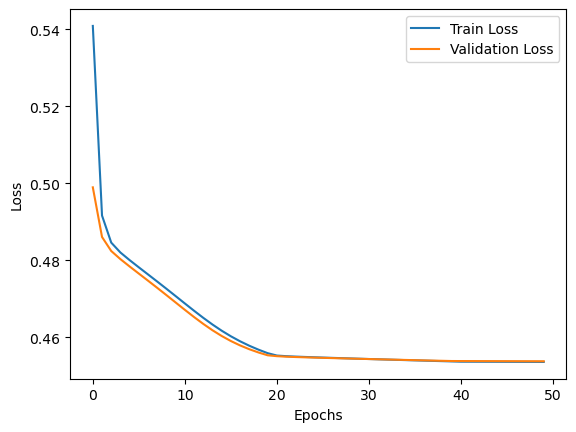

150/150 [==============================] - 2s 7ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
600/600 [==============================] - 12s 15ms/step - loss: 0.5392 - accuracy: 0.7770 - val_loss: 0.4972 - val_accuracy: 0.7798 - lr: 0.0100
Epoch 2/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4891 - accuracy: 0.7831 - val_loss: 0.4859 - val_accuracy: 0.7904 - lr: 0.0100
Epoch 3/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4830 - accuracy: 0.7935 - val_loss: 0.4829 - val_accuracy: 0.7940 - lr: 0.0100
Epoch 4/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4808 - accuracy: 0.7957 - val_loss: 0.4810 - val_accuracy: 0.7956 - lr: 0.0100
Epoch 5/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4789 - accuracy: 0.7969 - val_loss: 0.4792 - val_accuracy: 0.7977 - lr: 0.0100
Epoch 6/50
600/600 [==============================] - 8s 13ms/step - lo

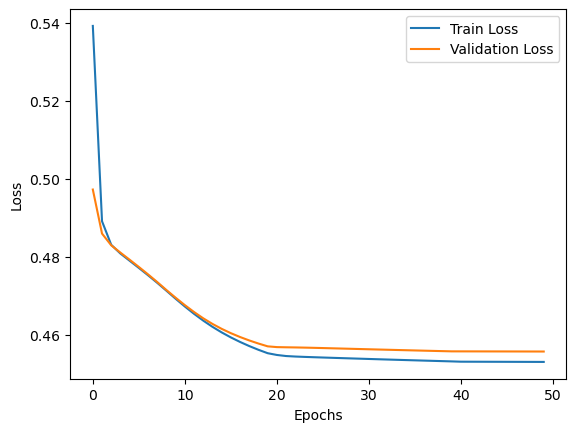

150/150 [==============================] - 2s 7ms/step
Configuration: Learning Rate=0.01, Optimizer=SGD,Batch Size =32
Accuracy: 0.805 (+/- 0.004)
Precision: 0.631 (+/- 0.018)
Recall: 0.281 (+/- 0.014)
F1 score: 0.389 (+/- 0.017)
AUC score: 0.617 (+/- 0.008)

Best Configuration (Learning Rate, Optimizer, Batch Size):
(0.01, <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x0000029B5713C430>, 32)
Best F1 Score: 0.3887864419870626


In [43]:
initial_learning_rates = [0.01]
optimizers = ['sgd']
batches = [32]

best_configuration = None
best_f1_score = 0.0

for lr in initial_learning_rates:
    for optimizer in optimizers:
        for bs in batches:
            
            fold_no = 1
            accuracy_scores = []
            precision_scores = []
            recall_scores = []
            f1_scores = []
            AUC_scores = []
        
            for train_index, test_index in kf.split(X_train, y_train):
                
                X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
                y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

                stacked_train, X_train_static, y_train_dl, stacked_test, X_test_static, y_test_dl = preprocess_data(X_train_dl,y_train_dl, X_test_dl, y_test_dl)
                
                # Build and compile LSTM model
                num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]
                
                # Define the LSTM model
                model = Sequential()
                model.add(LSTM(64, return_sequences=True, input_shape=(num_time_steps, num_features)))
                model.add(LSTM(64, return_sequences=True))
                model.add(Flatten())
                model.add(Dense(1, activation='sigmoid'))
                
                initial_learning_rate = lr  # Initial learning rate
                decay_rate = 0.1  # Decay rate
                decay_steps = 20  # Decay steps (number of steps before applying decay)
                epochs = 50

                def learning_rate_scheduler(epoch):
                    return initial_learning_rate * decay_rate ** (epoch // decay_steps)
                
                if optimizer == 'rmsprop':
                    optimizer = RMSprop(learning_rate=initial_learning_rate)
                elif optimizer == 'sgd':
                    optimizer = SGD(learning_rate=initial_learning_rate)
                elif optimizer == 'adamax':
                    optimizer = Adamax(learning_rate=initial_learning_rate)
                elif optimizer == 'adam':
                    optimizer = Adam(learning_rate=initial_learning_rate)
                
                
                model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
                
                lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
                
                print('------------------------------------------------------------------------')
                print(f'Training for fold {fold_no}')
            
                # Train the model
                batch_size = bs
                
                # Train the model
                history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
                
                # Plot the loss on train vs validate tests
                plt.plot(history.history['loss'], label='Train Loss')
                plt.plot(history.history['val_loss'], label='Validation Loss')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.show()
                
                y_pred_probs = model.predict(stacked_test)
                y_pred = (y_pred_probs>=0.5).astype(int)    
                
                accuracy =  accuracy_score(y_test_dl,y_pred)
                precision = precision_score(y_test_dl,y_pred)
                recall = recall_score(y_test_dl,y_pred)
                f1 =  f1_score(y_test_dl,y_pred)
                AUC = roc_auc_score(y_test_dl,y_pred)

                accuracy_scores.append(accuracy)
                precision_scores.append(precision)
                recall_scores.append(recall)
                f1_scores.append(f1)
                AUC_scores.append(AUC)
                
                fold_no = fold_no + 1
            
            # Calculate the average F1 score for the current configuration
            average_f1_score = np.mean(f1_scores)

            # Print the scores for the current configuration
            print(f"Configuration: Learning Rate={lr}, Optimizer={optimizer.get_config()['name']},Batch Size ={bs}")
            print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
            print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
            print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
            print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
            print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))
            print()
        
            # Check if the current configuration has a higher average F1 score
            # If so, update the best configuration and best F1 score
            if average_f1_score > best_f1_score:
                best_configuration = (lr, optimizer,batch_size)
                best_f1_score = average_f1_score


# Print the best configuration
print("Best Configuration (Learning Rate, Optimizer, Batch Size):")
print(best_configuration)
print("Best F1 Score:", best_f1_score)

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
300/300 [==============================] - 4s 9ms/step - loss: 0.5136 - accuracy: 0.7673 - val_loss: 0.4754 - val_accuracy: 0.7942 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 9ms/step - loss: 0.4613 - accuracy: 0.8024 - val_loss: 0.4633 - val_accuracy: 0.7967 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 3s 9ms/step - loss: 0.4534 - accuracy: 0.8058 - val_loss: 0.4585 - val_accuracy: 0.8010 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 9ms/step - loss: 0.4493 - accuracy: 0.8078 - val_loss: 0.4552 - val_accuracy: 0.8021 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 9ms/step - loss: 0.4465 - accuracy: 0.8085 - val_loss: 0.4529 - val_accuracy: 0.8033 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4445 - accuracy: 0.8098 - val_loss: 

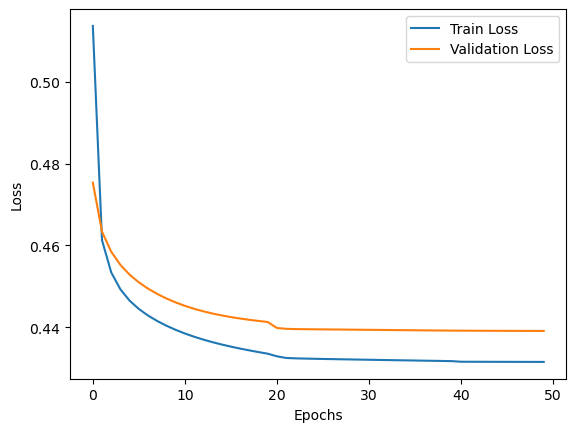

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
300/300 [==============================] - 4s 9ms/step - loss: 0.5010 - accuracy: 0.7759 - val_loss: 0.4626 - val_accuracy: 0.8029 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4604 - accuracy: 0.8017 - val_loss: 0.4536 - val_accuracy: 0.8044 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4541 - accuracy: 0.8045 - val_loss: 0.4485 - val_accuracy: 0.8060 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4501 - accuracy: 0.8051 - val_loss: 0.4451 - val_accuracy: 0.8085 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4472 - accuracy: 0.8071 - val_loss: 0.4426 - val_accuracy: 0.8110 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 2s 

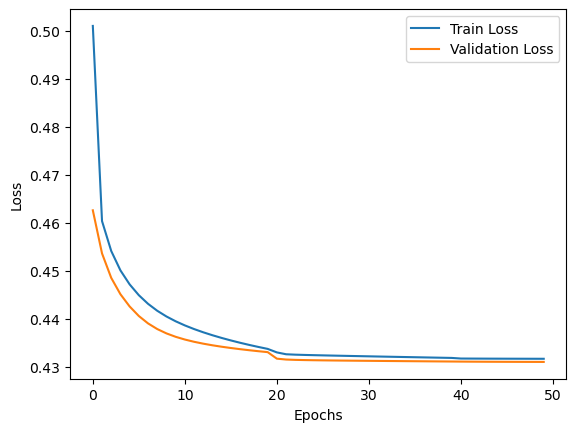

150/150 [==============================] - 1s 3ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
300/300 [==============================] - 4s 9ms/step - loss: 0.5196 - accuracy: 0.7586 - val_loss: 0.4650 - val_accuracy: 0.8010 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4595 - accuracy: 0.8012 - val_loss: 0.4565 - val_accuracy: 0.8065 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4526 - accuracy: 0.8047 - val_loss: 0.4532 - val_accuracy: 0.8067 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4484 - accuracy: 0.8072 - val_loss: 0.4512 - val_accuracy: 0.8090 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4452 - accuracy: 0.8091 - val_loss: 0.4498 - val_accuracy: 0.8100 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 2s 

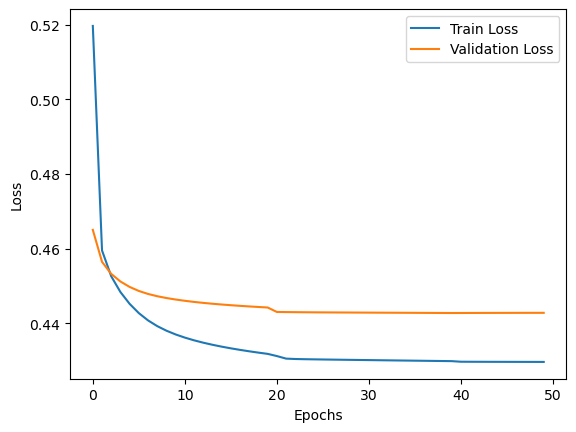

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
300/300 [==============================] - 5s 9ms/step - loss: 0.5262 - accuracy: 0.7555 - val_loss: 0.4709 - val_accuracy: 0.7996 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4644 - accuracy: 0.8021 - val_loss: 0.4592 - val_accuracy: 0.8044 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4567 - accuracy: 0.8038 - val_loss: 0.4536 - val_accuracy: 0.8056 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4520 - accuracy: 0.8051 - val_loss: 0.4497 - val_accuracy: 0.8092 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4486 - accuracy: 0.8059 - val_loss: 0.4469 - val_accuracy: 0.8104 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 3s 

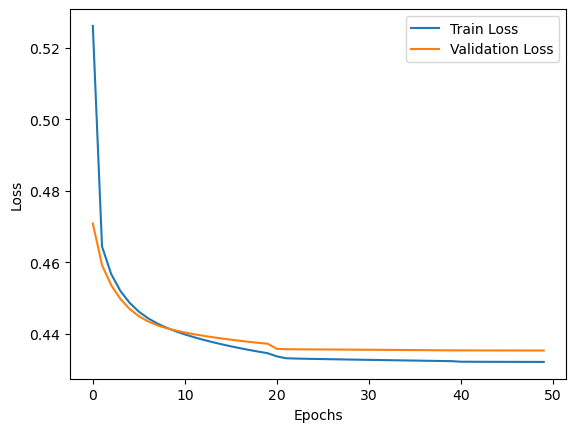

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
300/300 [==============================] - 5s 10ms/step - loss: 0.5040 - accuracy: 0.7718 - val_loss: 0.4599 - val_accuracy: 0.7985 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 9ms/step - loss: 0.4589 - accuracy: 0.8037 - val_loss: 0.4519 - val_accuracy: 0.8044 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4525 - accuracy: 0.8066 - val_loss: 0.4480 - val_accuracy: 0.8069 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4486 - accuracy: 0.8086 - val_loss: 0.4456 - val_accuracy: 0.8071 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4459 - accuracy: 0.8098 - val_loss: 0.4440 - val_accuracy: 0.8085 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 2s

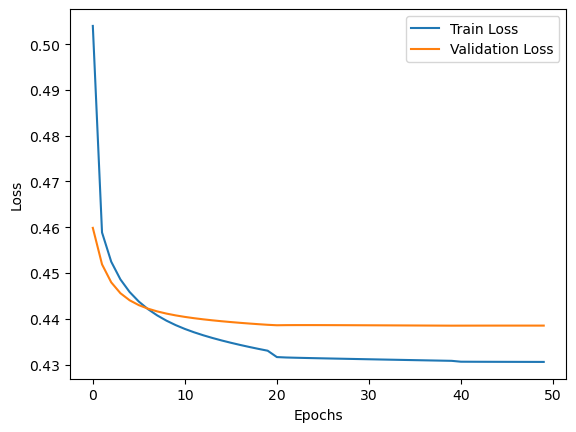

150/150 [==============================] - 1s 4ms/step
Accuracy: 0.818 (+/- 0.002)
Precision: 0.654 (+/- 0.006)
Recall: 0.371 (+/- 0.012)
F1 score: 0.474 (+/- 0.010)
AUC score: 0.658 (+/- 0.005)


In [142]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
AUC_scores = []

fold_no = 1
for train_index, test_index in kf.split(X_train, y_train):
    X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

    # Perform preprocessing steps on X_train_dl
    X_train_dl_preprocessed = enc_dl.fit_transform(X_train_dl)
    X_test_dl_preprocessed = enc_dl.transform(X_test_dl)

    # Apply SMOTE and undersampling to address class imbalance
    # over = SMOTE(sampling_strategy=0.4, random_state=42)
    # under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
    # steps = [('o',over),('u',under)]
    # pipe = Pipeline(steps=steps)
        
    # X_train_dl_resampled, y_train_dl_resampled =  pipe.fit_resample(X_train_dl_preprocessed, y_train_dl)
    
    # round_cols = ['SEX','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6'] + X_train_dl_resampled.filter(like='EDUCATION').columns.to_list() + X_train_dl_resampled.filter(like='MARRIAGE').columns.to_list() 
    # for col in round_cols:
    #     X_train_dl_resampled[col] = X_train_dl_resampled[col].round()
    
    # Split training data into static and temporal features
    # Perform any necessary reshaping or transformations
    temp_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
    'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    static_cols_train = X_train_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
    static_cols_test = X_test_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
    
    X_train_dl_temp = X_train_dl_preprocessed[temp_cols]
    X_train_dl_static = X_train_dl_preprocessed[static_cols_train]
    X_test_dl_temp = X_test_dl_preprocessed[temp_cols]
    X_test_dl_static = X_test_dl_preprocessed[static_cols_test]

    PAY_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_1']
    BILL_AMT_cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
    PAY_AMT_cols = ['PAY_AMT6','PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
    
    PAY_train_dl = X_train_dl_temp[PAY_cols].to_numpy()
    BILL_AMT_train_dl = X_train_dl_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_train_dl = X_train_dl_temp[PAY_AMT_cols].to_numpy()
    
    PAY_test_dl = X_test_dl_temp[PAY_cols].to_numpy()
    BILL_AMT_test_dl = X_test_dl_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_test_dl = X_test_dl_temp[PAY_AMT_cols].to_numpy()   
    
    # Stack temporal features
    stacked_train = np.dstack((PAY_train_dl,BILL_AMT_train_dl,PAY_AMT_train_dl))
    stacked_test = np.dstack((PAY_test_dl,BILL_AMT_test_dl,PAY_AMT_test_dl))
    y_train_dl = y_train_dl.to_numpy()
    y_test_dl = y_test_dl.to_numpy()

    # Build and compile LSTM model
    num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]

    # Define the LSTM model
    model = Sequential()
    model.add(SimpleRNN(32,return_sequences=True, input_shape=(num_time_steps, num_features)))
    model.add(SimpleRNN(32,return_sequences=True))
    model.add(SimpleRNN(32,return_sequences=True))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    initial_learning_rate = 0.0001  # Initial learning rate
    decay_rate = 0.1  # Decay rate
    decay_steps = 20  # Decay steps (number of steps before applying decay)
    epochs = 50

    def learning_rate_scheduler(epoch):
        return initial_learning_rate * decay_rate ** (epoch // decay_steps)
    
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])
    
    lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no}')
 
    # Train the model
    batch_size = 64
    
    # Train the model
    history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
    
    # Plot the loss on train vs validate tests
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    y_pred_probs = model.predict(stacked_test)
    y_pred = (y_pred_probs>=0.5).astype(int)    
    
    accuracy =  accuracy_score(y_test_dl,y_pred)
    precision = precision_score(y_test_dl,y_pred)
    recall = recall_score(y_test_dl,y_pred)
    f1 =  f1_score(y_test_dl,y_pred)
    AUC = roc_auc_score(y_test_dl,y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    AUC_scores.append(AUC)
    
    fold_no = fold_no + 1


# Calculate the average and standard deviation of the evaluation metrics
print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))

In [143]:
model.summary()

Model: "sequential_182"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_251 (SimpleRNN)  (None, 6, 32)             1152      
                                                                 
 simple_rnn_252 (SimpleRNN)  (None, 6, 32)             2080      
                                                                 
 simple_rnn_253 (SimpleRNN)  (None, 6, 32)             2080      
                                                                 
 flatten_182 (Flatten)       (None, 192)               0         
                                                                 
 dense_182 (Dense)           (None, 1)                 193       
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


### RNN  Tuning Architectures

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
300/300 [==============================] - 6s 12ms/step - loss: 0.5343 - accuracy: 0.7486 - val_loss: 0.4733 - val_accuracy: 0.7885 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4632 - accuracy: 0.8007 - val_loss: 0.4606 - val_accuracy: 0.7965 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4538 - accuracy: 0.8054 - val_loss: 0.4552 - val_accuracy: 0.8008 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4486 - accuracy: 0.8079 - val_loss: 0.4517 - val_accuracy: 0.8056 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4451 - accuracy: 0.8093 - val_loss: 0.4493 - val_accuracy: 0.8079 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4427 - accuracy: 0.8105 - val_

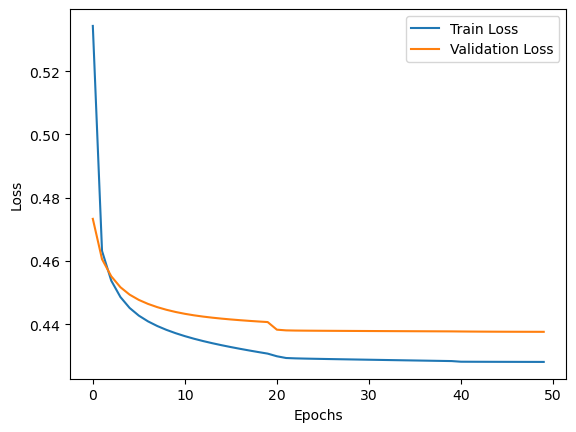

150/150 [==============================] - 1s 5ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
300/300 [==============================] - 6s 13ms/step - loss: 0.4962 - accuracy: 0.7771 - val_loss: 0.4582 - val_accuracy: 0.8033 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4565 - accuracy: 0.8049 - val_loss: 0.4507 - val_accuracy: 0.8069 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4511 - accuracy: 0.8061 - val_loss: 0.4474 - val_accuracy: 0.8085 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4482 - accuracy: 0.8076 - val_loss: 0.4454 - val_accuracy: 0.8094 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4461 - accuracy: 0.8081 - val_loss: 0.4439 - val_accuracy: 0.8100 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

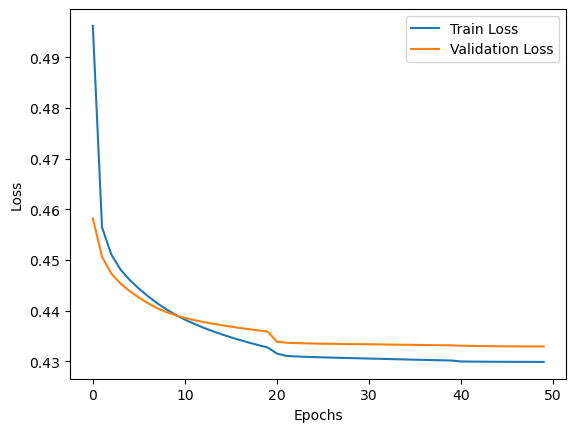

150/150 [==============================] - 1s 5ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
300/300 [==============================] - 6s 12ms/step - loss: 0.5187 - accuracy: 0.7583 - val_loss: 0.4690 - val_accuracy: 0.8027 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4614 - accuracy: 0.8015 - val_loss: 0.4570 - val_accuracy: 0.8081 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4507 - accuracy: 0.8051 - val_loss: 0.4518 - val_accuracy: 0.8104 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4449 - accuracy: 0.8086 - val_loss: 0.4492 - val_accuracy: 0.8131 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4416 - accuracy: 0.8111 - val_loss: 0.4478 - val_accuracy: 0.8140 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

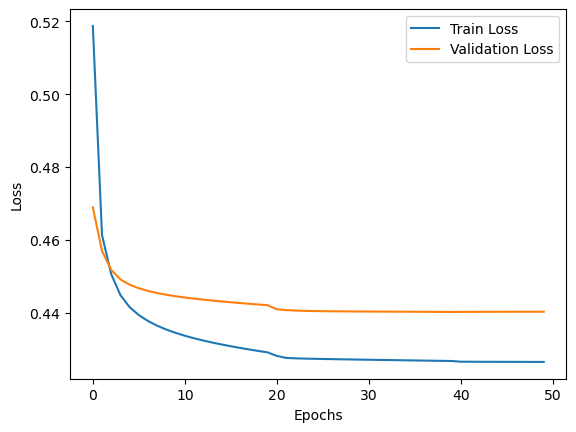

150/150 [==============================] - 1s 5ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
300/300 [==============================] - 6s 13ms/step - loss: 0.5017 - accuracy: 0.7764 - val_loss: 0.4638 - val_accuracy: 0.8027 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4590 - accuracy: 0.8038 - val_loss: 0.4556 - val_accuracy: 0.8060 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4525 - accuracy: 0.8063 - val_loss: 0.4508 - val_accuracy: 0.8079 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4484 - accuracy: 0.8073 - val_loss: 0.4474 - val_accuracy: 0.8092 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4456 - accuracy: 0.8091 - val_loss: 0.4450 - val_accuracy: 0.8108 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

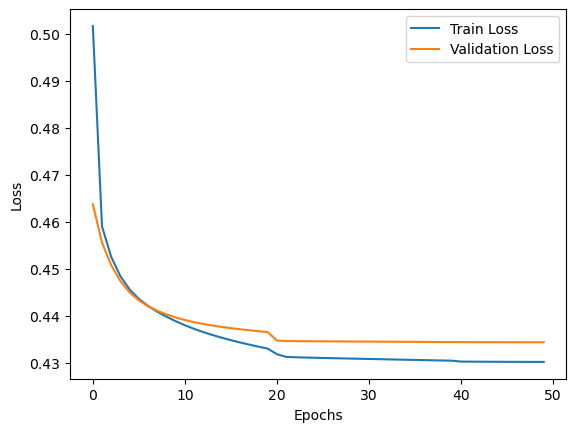

150/150 [==============================] - 2s 7ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
300/300 [==============================] - 7s 14ms/step - loss: 0.5050 - accuracy: 0.7674 - val_loss: 0.4605 - val_accuracy: 0.8002 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 4s 12ms/step - loss: 0.4553 - accuracy: 0.8051 - val_loss: 0.4520 - val_accuracy: 0.8033 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 4s 12ms/step - loss: 0.4488 - accuracy: 0.8069 - val_loss: 0.4481 - val_accuracy: 0.8073 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4450 - accuracy: 0.8093 - val_loss: 0.4456 - val_accuracy: 0.8079 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 4s 12ms/step - loss: 0.4422 - accuracy: 0.8101 - val_loss: 0.4439 - val_accuracy: 0.8094 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

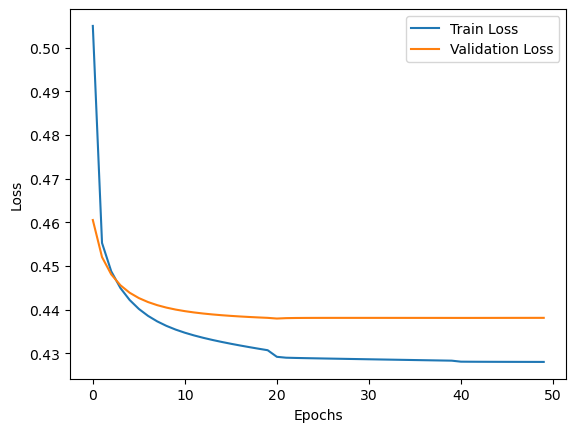

150/150 [==============================] - 1s 5ms/step
Architecture: {'hidden_layers': 4, 'units_per_layer': 32}
Accuracy: 0.818 (+/- 0.002)
Precision: 0.658 (+/- 0.006)
Recall: 0.368 (+/- 0.010)
F1 score: 0.472 (+/- 0.009)
AUC score: 0.657 (+/- 0.004)

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
300/300 [==============================] - 10s 26ms/step - loss: 0.4817 - accuracy: 0.7853 - val_loss: 0.4559 - val_accuracy: 0.8037 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 7s 22ms/step - loss: 0.4494 - accuracy: 0.8079 - val_loss: 0.4497 - val_accuracy: 0.8046 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 7s 22ms/step - loss: 0.4449 - accuracy: 0.8099 - val_loss: 0.4471 - val_accuracy: 0.8067 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 7s 23ms/step - loss: 0.4424 - accuracy: 0.8117 - val_loss: 0.4456 - val_accuracy: 0.8090 - lr: 1.0000e-04
Epoch 5/50
3

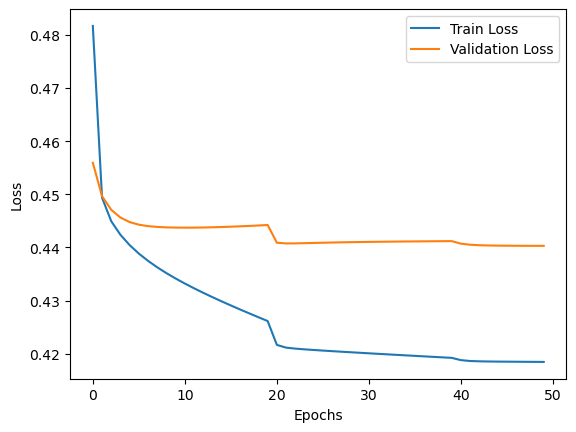

150/150 [==============================] - 1s 8ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
300/300 [==============================] - 8s 22ms/step - loss: 0.4768 - accuracy: 0.7909 - val_loss: 0.4464 - val_accuracy: 0.8104 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 6s 21ms/step - loss: 0.4500 - accuracy: 0.8075 - val_loss: 0.4408 - val_accuracy: 0.8144 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 6s 20ms/step - loss: 0.4456 - accuracy: 0.8112 - val_loss: 0.4389 - val_accuracy: 0.8146 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 6s 20ms/step - loss: 0.4430 - accuracy: 0.8120 - val_loss: 0.4379 - val_accuracy: 0.8158 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 6s 20ms/step - loss: 0.4411 - accuracy: 0.8139 - val_loss: 0.4373 - val_accuracy: 0.8167 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

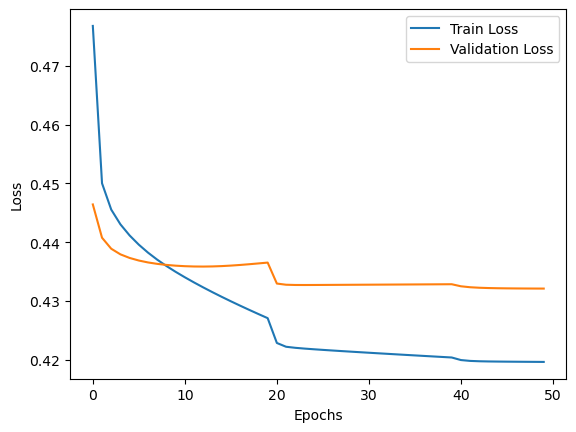

150/150 [==============================] - 1s 8ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
300/300 [==============================] - 8s 20ms/step - loss: 0.4757 - accuracy: 0.7911 - val_loss: 0.4523 - val_accuracy: 0.8090 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 6s 19ms/step - loss: 0.4485 - accuracy: 0.8076 - val_loss: 0.4480 - val_accuracy: 0.8115 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 6s 19ms/step - loss: 0.4436 - accuracy: 0.8115 - val_loss: 0.4464 - val_accuracy: 0.8131 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 6s 19ms/step - loss: 0.4409 - accuracy: 0.8132 - val_loss: 0.4455 - val_accuracy: 0.8150 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 6s 19ms/step - loss: 0.4389 - accuracy: 0.8144 - val_loss: 0.4449 - val_accuracy: 0.8171 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

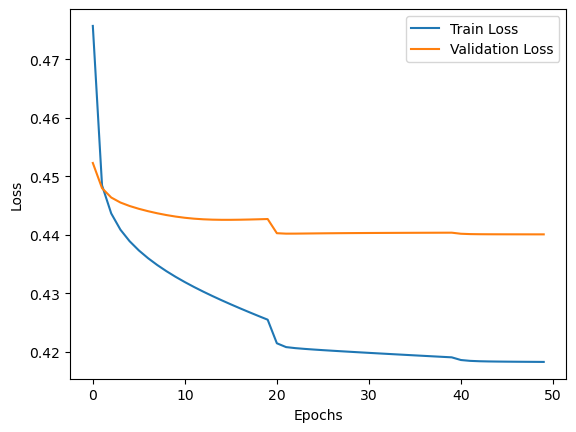

150/150 [==============================] - 1s 6ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
300/300 [==============================] - 10s 25ms/step - loss: 0.4751 - accuracy: 0.7935 - val_loss: 0.4527 - val_accuracy: 0.8069 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 7s 22ms/step - loss: 0.4514 - accuracy: 0.8073 - val_loss: 0.4447 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 7s 22ms/step - loss: 0.4469 - accuracy: 0.8104 - val_loss: 0.4409 - val_accuracy: 0.8163 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 7s 22ms/step - loss: 0.4441 - accuracy: 0.8111 - val_loss: 0.4389 - val_accuracy: 0.8150 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 7s 22ms/step - loss: 0.4420 - accuracy: 0.8124 - val_loss: 0.4378 - val_accuracy: 0.8173 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================]

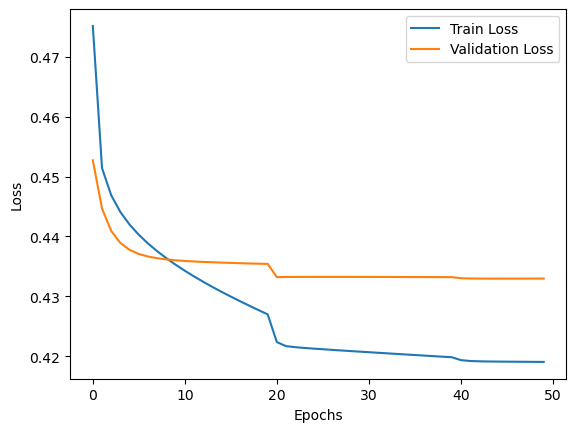

150/150 [==============================] - 1s 6ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
300/300 [==============================] - 8s 22ms/step - loss: 0.4749 - accuracy: 0.7943 - val_loss: 0.4504 - val_accuracy: 0.8065 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 6s 21ms/step - loss: 0.4491 - accuracy: 0.8092 - val_loss: 0.4465 - val_accuracy: 0.8087 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 6s 20ms/step - loss: 0.4446 - accuracy: 0.8119 - val_loss: 0.4452 - val_accuracy: 0.8096 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 6s 20ms/step - loss: 0.4421 - accuracy: 0.8130 - val_loss: 0.4444 - val_accuracy: 0.8129 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 6s 20ms/step - loss: 0.4403 - accuracy: 0.8152 - val_loss: 0.4438 - val_accuracy: 0.8154 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

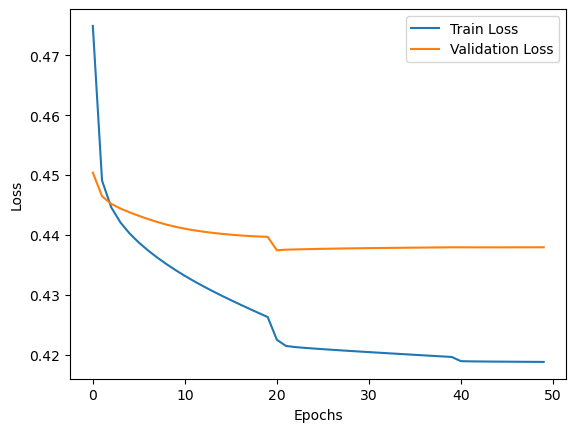

150/150 [==============================] - 2s 8ms/step
Architecture: {'hidden_layers': 3, 'units_per_layer': 128}
Accuracy: 0.817 (+/- 0.003)
Precision: 0.651 (+/- 0.012)
Recall: 0.372 (+/- 0.011)
F1 score: 0.473 (+/- 0.011)
AUC score: 0.658 (+/- 0.005)

Best Architecture:
{'hidden_layers': 3, 'units_per_layer': 128}
Best F1 Score: 0.47306751109399486


In [136]:
architectures = [
    {'hidden_layers': 4, 'units_per_layer': 32},
    {'hidden_layers': 3, 'units_per_layer': 128}    
]

best_architecture = None
best_f1_score = 0.0

for architecture in architectures:
    fold_no = 1
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    AUC_scores = []
    
    for train_index, test_index in kf.split(X_train, y_train):
        
        X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

        stacked_train, X_train_static, y_train_dl, stacked_test, X_test_static, y_test_dl = preprocess_data(X_train_dl,y_train_dl, X_test_dl, y_test_dl)
        
        # Build and compile LSTM model
        num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]
        
        # Define the LSTM model
        model = Sequential()
        model.add(SimpleRNN(architecture['units_per_layer'], return_sequences=True, input_shape=(num_time_steps, num_features)))
        for _ in range(1, architecture['hidden_layers']):
            model.add(SimpleRNN(architecture['units_per_layer'], return_sequences=True))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        
        initial_learning_rate = 0.0001  # Initial learning rate
        decay_rate = 0.1  # Decay rate
        decay_steps = 20  # Decay steps (number of steps before applying decay)
        epochs = 50

        def learning_rate_scheduler(epoch):
            return initial_learning_rate * decay_rate ** (epoch // decay_steps)
        
        
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])
        
        lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
        
        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no}')
    
        # Train the model
        batch_size = 64
        
        # Train the model
        history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
        
        # Plot the loss on train vs validate tests
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        y_pred_probs = model.predict(stacked_test)
        y_pred = (y_pred_probs>=0.5).astype(int)    
        
        accuracy =  accuracy_score(y_test_dl,y_pred)
        precision = precision_score(y_test_dl,y_pred)
        recall = recall_score(y_test_dl,y_pred)
        f1 =  f1_score(y_test_dl,y_pred)
        AUC = roc_auc_score(y_test_dl,y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        AUC_scores.append(AUC)
        
        fold_no = fold_no + 1
        
    # Calculate the average F1 score for the current architecture
    average_f1_score = np.mean(f1_scores)

    # Print the scores for the current architecture
    print(f"Architecture: {architecture}")
    print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
    print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
    print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
    print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
    print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))
    print()
    
    # Check if the current architecture has a higher average F1 score
    # If so, update the best architecture and best F1 score
    if average_f1_score > best_f1_score:
        best_architecture = architecture
        best_f1_score = average_f1_score


# Print the best architecture
print("Best Architecture:")
print(best_architecture)
print("Best F1 Score:", best_f1_score)

### RNN Tuning Optimizer, lr, bs

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
600/600 [==============================] - 10s 12ms/step - loss: 0.5038 - accuracy: 0.7695 - val_loss: 0.4612 - val_accuracy: 0.7960 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 7s 12ms/step - loss: 0.4527 - accuracy: 0.8069 - val_loss: 0.4532 - val_accuracy: 0.8044 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 7s 12ms/step - loss: 0.4467 - accuracy: 0.8095 - val_loss: 0.4490 - val_accuracy: 0.8048 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4432 - accuracy: 0.8113 - val_loss: 0.4465 - val_accuracy: 0.8081 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 6s 11ms/step - loss: 0.4409 - accuracy: 0.8120 - val_loss: 0.4449 - val_accuracy: 0.8115 - lr: 1.0000e-04
Epoch 6/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4393 - accuracy: 0.8129 - val

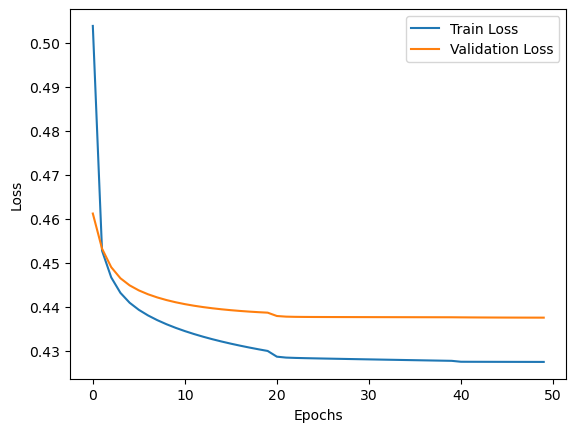

150/150 [==============================] - 1s 5ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
600/600 [==============================] - 11s 14ms/step - loss: 0.4881 - accuracy: 0.7830 - val_loss: 0.4539 - val_accuracy: 0.8062 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4547 - accuracy: 0.8041 - val_loss: 0.4463 - val_accuracy: 0.8096 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4491 - accuracy: 0.8077 - val_loss: 0.4426 - val_accuracy: 0.8115 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4459 - accuracy: 0.8099 - val_loss: 0.4404 - val_accuracy: 0.8140 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4437 - accuracy: 0.8107 - val_loss: 0.4389 - val_accuracy: 0.8142 - lr: 1.0000e-04
Epoch 6/50
600/600 [==============================]

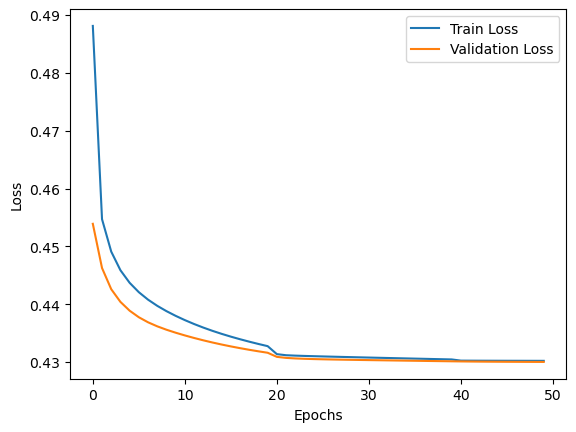

150/150 [==============================] - 1s 5ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
600/600 [==============================] - 9s 11ms/step - loss: 0.4871 - accuracy: 0.7822 - val_loss: 0.4575 - val_accuracy: 0.8075 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4504 - accuracy: 0.8059 - val_loss: 0.4505 - val_accuracy: 0.8104 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4441 - accuracy: 0.8095 - val_loss: 0.4480 - val_accuracy: 0.8131 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4408 - accuracy: 0.8111 - val_loss: 0.4467 - val_accuracy: 0.8131 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4388 - accuracy: 0.8126 - val_loss: 0.4457 - val_accuracy: 0.8135 - lr: 1.0000e-04
Epoch 6/50
600/600 [==============================] 

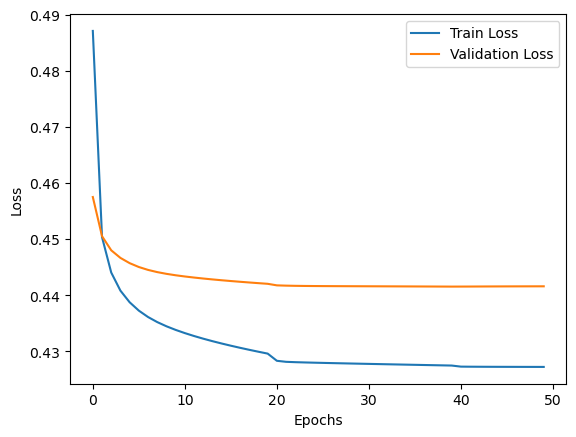

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
600/600 [==============================] - 8s 9ms/step - loss: 0.4989 - accuracy: 0.7707 - val_loss: 0.4586 - val_accuracy: 0.8008 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 5s 8ms/step - loss: 0.4563 - accuracy: 0.8028 - val_loss: 0.4507 - val_accuracy: 0.8081 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 5s 8ms/step - loss: 0.4505 - accuracy: 0.8067 - val_loss: 0.4465 - val_accuracy: 0.8100 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 5s 8ms/step - loss: 0.4470 - accuracy: 0.8094 - val_loss: 0.4440 - val_accuracy: 0.8098 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 5s 8ms/step - loss: 0.4446 - accuracy: 0.8101 - val_loss: 0.4421 - val_accuracy: 0.8117 - lr: 1.0000e-04
Epoch 6/50
600/600 [==============================] - 5s 

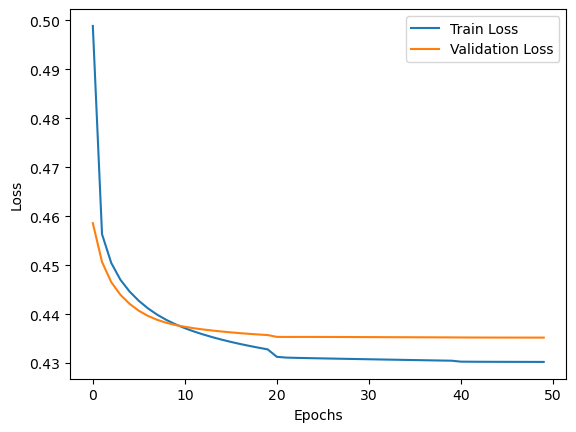

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
600/600 [==============================] - 10s 12ms/step - loss: 0.4947 - accuracy: 0.7794 - val_loss: 0.4587 - val_accuracy: 0.8019 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4543 - accuracy: 0.8037 - val_loss: 0.4508 - val_accuracy: 0.8065 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 5s 9ms/step - loss: 0.4479 - accuracy: 0.8085 - val_loss: 0.4472 - val_accuracy: 0.8046 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 6s 9ms/step - loss: 0.4443 - accuracy: 0.8102 - val_loss: 0.4454 - val_accuracy: 0.8046 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 6s 9ms/step - loss: 0.4420 - accuracy: 0.8116 - val_loss: 0.4443 - val_accuracy: 0.8067 - lr: 1.0000e-04
Epoch 6/50
600/600 [==============================] - 

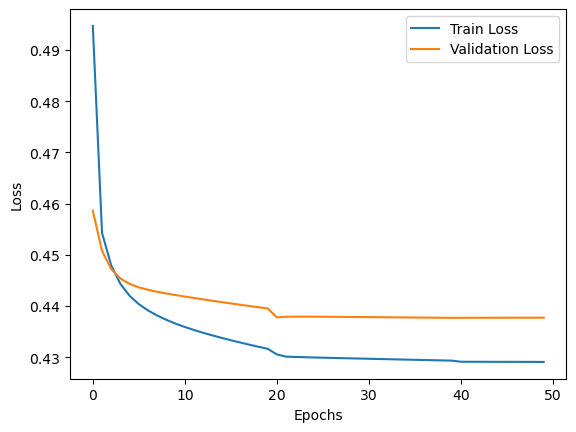

150/150 [==============================] - 1s 5ms/step
Configuration: Learning Rate=0.0001, Optimizer=RMSprop,Batch Size =32
Accuracy: 0.818 (+/- 0.002)
Precision: 0.650 (+/- 0.010)
Recall: 0.380 (+/- 0.012)
F1 score: 0.480 (+/- 0.010)
AUC score: 0.661 (+/- 0.005)

Best Configuration (Learning Rate, Optimizer, Batch Size):
(0.0001, <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x000002174D159C60>, 32)
Best F1 Score: 0.4795733841355311


In [38]:
initial_learning_rates = [0.0001]
optimizers = ['rmsprop']
batches = [32]

best_configuration = None
best_f1_score = 0.0

for lr in initial_learning_rates:
    for optimizer in optimizers:
        for bs in batches:
            
            fold_no = 1
            accuracy_scores = []
            precision_scores = []
            recall_scores = []
            f1_scores = []
            AUC_scores = []
        
            for train_index, test_index in kf.split(X_train, y_train):
                
                X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
                y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

                stacked_train, X_train_static, y_train_dl, stacked_test, X_test_static, y_test_dl = preprocess_data(X_train_dl,y_train_dl, X_test_dl, y_test_dl)
                
                # Build and compile LSTM model
                num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]
                
                # Define the LSTM model
                model = Sequential()
                model.add(SimpleRNN(32, return_sequences=True, input_shape=(num_time_steps, num_features)))
                model.add(SimpleRNN(32, return_sequences=True))
                model.add(SimpleRNN(32, return_sequences=True))
                model.add(Flatten())
                model.add(Dense(1, activation='sigmoid'))
                
                initial_learning_rate = lr  # Initial learning rate
                decay_rate = 0.1  # Decay rate
                decay_steps = 20  # Decay steps (number of steps before applying decay)
                epochs = 50

                def learning_rate_scheduler(epoch):
                    return initial_learning_rate * decay_rate ** (epoch // decay_steps)
                
                if optimizer == 'rmsprop':
                    optimizer = RMSprop(learning_rate=initial_learning_rate)
                elif optimizer == 'sgd':
                    optimizer = SGD(learning_rate=initial_learning_rate)
                elif optimizer == 'adamax':
                    optimizer = Adamax(learning_rate=initial_learning_rate)
                elif optimizer == 'adam':
                    optimizer = Adam(learning_rate=initial_learning_rate)
                
                
                model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
                
                lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
                
                print('------------------------------------------------------------------------')
                print(f'Training for fold {fold_no}')
            
                # Train the model
                batch_size = bs
                
                # Train the model
                history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
                
                # Plot the loss on train vs validate tests
                plt.plot(history.history['loss'], label='Train Loss')
                plt.plot(history.history['val_loss'], label='Validation Loss')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.show()
                
                y_pred_probs = model.predict(stacked_test)
                y_pred = (y_pred_probs>=0.5).astype(int)    
                
                accuracy =  accuracy_score(y_test_dl,y_pred)
                precision = precision_score(y_test_dl,y_pred)
                recall = recall_score(y_test_dl,y_pred)
                f1 =  f1_score(y_test_dl,y_pred)
                AUC = roc_auc_score(y_test_dl,y_pred)

                accuracy_scores.append(accuracy)
                precision_scores.append(precision)
                recall_scores.append(recall)
                f1_scores.append(f1)
                AUC_scores.append(AUC)
                
                fold_no = fold_no + 1
            
            # Calculate the average F1 score for the current configuration
            average_f1_score = np.mean(f1_scores)

            # Print the scores for the current configuration
            print(f"Configuration: Learning Rate={lr}, Optimizer={optimizer.get_config()['name']},Batch Size ={bs}")
            print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
            print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
            print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
            print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
            print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))
            print()
        
            # Check if the current configuration has a higher average F1 score
            # If so, update the best configuration and best F1 score
            if average_f1_score > best_f1_score:
                best_configuration = (lr, optimizer,batch_size)
                best_f1_score = average_f1_score


# Print the best configuration
print("Best Configuration (Learning Rate, Optimizer, Batch Size):")
print(best_configuration)
print("Best F1 Score:", best_f1_score)

### CNN 

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
150/150 [==============================] - 10s 61ms/step - loss: 0.4916 - accuracy: 0.7931 - val_loss: 0.4617 - val_accuracy: 0.8071 - lr: 0.0100
Epoch 2/50
150/150 [==============================] - 9s 57ms/step - loss: 0.4456 - accuracy: 0.8094 - val_loss: 0.4553 - val_accuracy: 0.8112 - lr: 0.0100
Epoch 3/50
150/150 [==============================] - 8s 53ms/step - loss: 0.4431 - accuracy: 0.8101 - val_loss: 0.4543 - val_accuracy: 0.8115 - lr: 0.0100
Epoch 4/50
150/150 [==============================] - 7s 49ms/step - loss: 0.4398 - accuracy: 0.8148 - val_loss: 0.4530 - val_accuracy: 0.8158 - lr: 0.0100
Epoch 5/50
150/150 [==============================] - 8s 51ms/step - loss: 0.4375 - accuracy: 0.8165 - val_loss: 0.4537 - val_accuracy: 0.8115 - lr: 0.0100
Epoch 6/50
150/150 [==============================] - 9s 61ms/step - loss: 0.4364 - accuracy: 0.8188 - val_loss: 0.4500 - val_

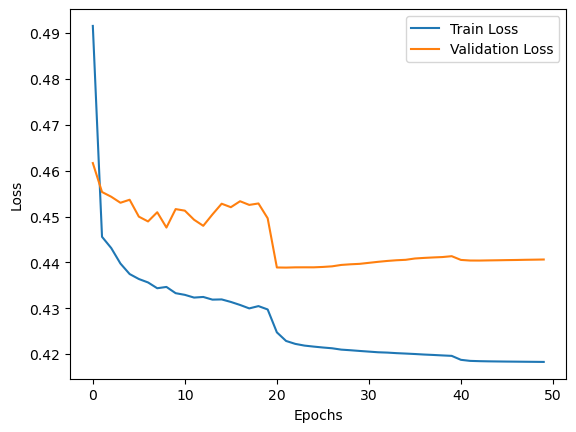

150/150 [==============================] - 1s 3ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
150/150 [==============================] - 8s 47ms/step - loss: 0.4928 - accuracy: 0.7912 - val_loss: 0.4356 - val_accuracy: 0.8173 - lr: 0.0100
Epoch 2/50
150/150 [==============================] - 7s 48ms/step - loss: 0.4488 - accuracy: 0.8159 - val_loss: 0.4315 - val_accuracy: 0.8208 - lr: 0.0100
Epoch 3/50
150/150 [==============================] - 7s 48ms/step - loss: 0.4449 - accuracy: 0.8168 - val_loss: 0.4350 - val_accuracy: 0.8213 - lr: 0.0100
Epoch 4/50
150/150 [==============================] - 7s 47ms/step - loss: 0.4429 - accuracy: 0.8170 - val_loss: 0.4372 - val_accuracy: 0.8225 - lr: 0.0100
Epoch 5/50
150/150 [==============================] - 7s 48ms/step - loss: 0.4409 - accuracy: 0.8177 - val_loss: 0.4353 - val_accuracy: 0.8242 - lr: 0.0100
Epoch 6/50
150/150 [==============================] - 7s 47ms/step - los

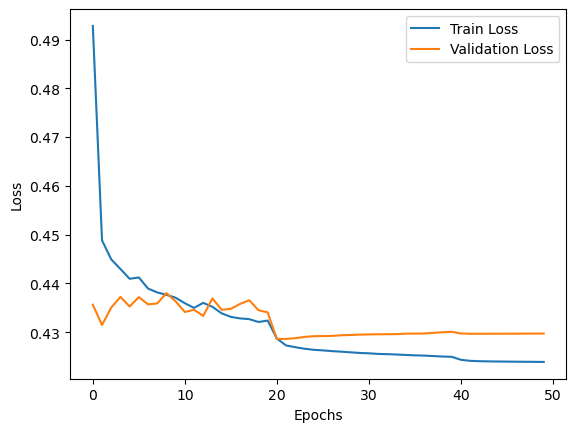

150/150 [==============================] - 1s 3ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
150/150 [==============================] - 8s 49ms/step - loss: 0.4747 - accuracy: 0.8008 - val_loss: 0.4508 - val_accuracy: 0.8119 - lr: 0.0100
Epoch 2/50
150/150 [==============================] - 5s 33ms/step - loss: 0.4473 - accuracy: 0.8118 - val_loss: 0.4548 - val_accuracy: 0.8102 - lr: 0.0100
Epoch 3/50
150/150 [==============================] - 6s 38ms/step - loss: 0.4416 - accuracy: 0.8148 - val_loss: 0.4472 - val_accuracy: 0.8167 - lr: 0.0100
Epoch 4/50
150/150 [==============================] - 6s 43ms/step - loss: 0.4397 - accuracy: 0.8178 - val_loss: 0.4458 - val_accuracy: 0.8175 - lr: 0.0100
Epoch 5/50
150/150 [==============================] - 6s 43ms/step - loss: 0.4373 - accuracy: 0.8177 - val_loss: 0.4446 - val_accuracy: 0.8158 - lr: 0.0100
Epoch 6/50
150/150 [==============================] - 6s 43ms/step - los

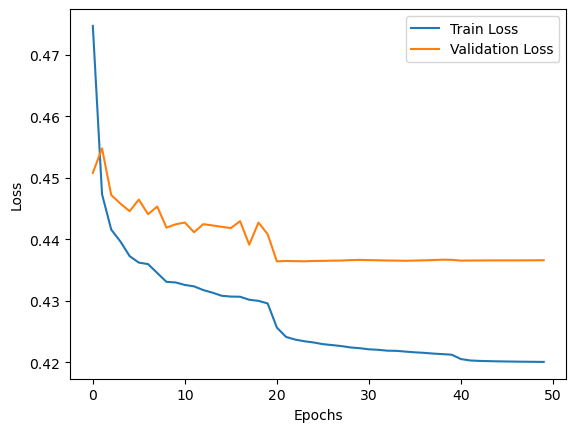

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
150/150 [==============================] - 8s 46ms/step - loss: 0.4831 - accuracy: 0.8000 - val_loss: 0.4456 - val_accuracy: 0.8123 - lr: 0.0100
Epoch 2/50
150/150 [==============================] - 7s 47ms/step - loss: 0.4482 - accuracy: 0.8098 - val_loss: 0.4462 - val_accuracy: 0.8119 - lr: 0.0100
Epoch 3/50
150/150 [==============================] - 7s 45ms/step - loss: 0.4435 - accuracy: 0.8135 - val_loss: 0.4451 - val_accuracy: 0.8106 - lr: 0.0100
Epoch 4/50
150/150 [==============================] - 7s 49ms/step - loss: 0.4410 - accuracy: 0.8168 - val_loss: 0.4454 - val_accuracy: 0.8123 - lr: 0.0100
Epoch 5/50
150/150 [==============================] - 7s 44ms/step - loss: 0.4395 - accuracy: 0.8170 - val_loss: 0.4437 - val_accuracy: 0.8121 - lr: 0.0100
Epoch 6/50
150/150 [==============================] - 6s 42ms/step - los

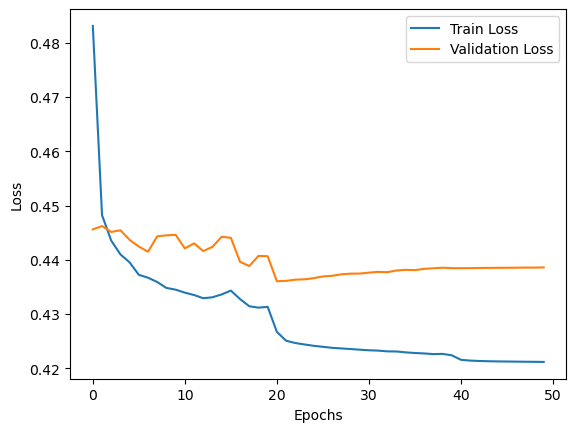

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
150/150 [==============================] - 8s 51ms/step - loss: 0.4697 - accuracy: 0.8056 - val_loss: 0.4416 - val_accuracy: 0.8131 - lr: 0.0100
Epoch 2/50
150/150 [==============================] - 7s 46ms/step - loss: 0.4451 - accuracy: 0.8170 - val_loss: 0.4480 - val_accuracy: 0.8165 - lr: 0.0100
Epoch 3/50
150/150 [==============================] - 7s 46ms/step - loss: 0.4413 - accuracy: 0.8178 - val_loss: 0.4491 - val_accuracy: 0.8163 - lr: 0.0100
Epoch 4/50
150/150 [==============================] - 7s 46ms/step - loss: 0.4396 - accuracy: 0.8183 - val_loss: 0.4465 - val_accuracy: 0.8165 - lr: 0.0100
Epoch 5/50
150/150 [==============================] - 7s 45ms/step - loss: 0.4385 - accuracy: 0.8190 - val_loss: 0.4501 - val_accuracy: 0.8167 - lr: 0.0100
Epoch 6/50
150/150 [==============================] - 7s 43ms/step - los

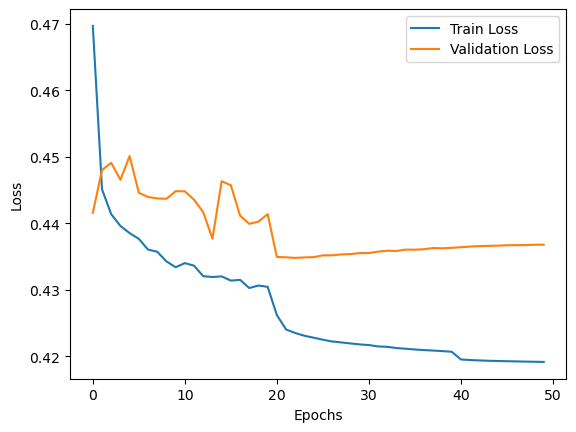

150/150 [==============================] - 0s 2ms/step
Accuracy: 0.818 (+/- 0.002)
Precision: 0.662 (+/- 0.019)
Recall: 0.364 (+/- 0.028)
F1 score: 0.468 (+/- 0.017)
AUC score: 0.655 (+/- 0.009)


In [94]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
AUC_scores = []

fold_no = 1
for train_index, test_index in kf.split(X_train, y_train):
    X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

    stacked_train, X_train_static, y_train_dl, stacked_test, X_test_static, y_test_dl = preprocess_data(X_train_dl,y_train_dl, X_test_dl, y_test_dl)


    # Build and compile CNN model
    num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]

    # Define the CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=8, kernel_size=6, padding='same', activation='relu', input_shape=(num_time_steps, num_features)))
    cnn_model.add(MaxPooling1D(pool_size=3))
    cnn_model.add(Conv1D(filters=16, kernel_size=4, padding='same', activation='relu'))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(1, activation='sigmoid'))
    
    initial_learning_rate = 0.01  # Initial learning rate
    decay_rate = 0.1  # Decay rate
    decay_steps = 20  # Decay steps (number of steps before applying decay)
    epochs = 50

    def learning_rate_scheduler(epoch):
        return initial_learning_rate * decay_rate ** (epoch // decay_steps)
    
    cnn_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = initial_learning_rate), metrics=['accuracy'])
    
    lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no}')
 
    # Train the model
    
    batch_size = 128
    
    # Train the model
    history = cnn_model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
    
    # Plot the loss on train vs validate tests
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    y_pred_probs = cnn_model.predict(stacked_test)
    y_pred = (y_pred_probs>=0.5).astype(int)    
    
    accuracy =  accuracy_score(y_test_dl,y_pred)
    precision = precision_score(y_test_dl,y_pred)
    recall = recall_score(y_test_dl,y_pred)
    f1 =  f1_score(y_test_dl,y_pred)
    AUC = roc_auc_score(y_test_dl,y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    AUC_scores.append(AUC)
    
    fold_no = fold_no + 1


# Calculate the average and standard deviation of the evaluation metrics
print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))

In [84]:
cnn_model.summary()

Model: "sequential_314"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_415 (Conv1D)         (None, 6, 256)            3328      
                                                                 
 flatten_311 (Flatten)       (None, 1536)              0         
                                                                 
 dense_312 (Dense)           (None, 1)                 1537      
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


### CNN Tuning Architectures

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
300/300 [==============================] - 6s 18ms/step - loss: 0.5157 - accuracy: 0.7860 - val_loss: 0.4678 - val_accuracy: 0.8040 - lr: 0.0010
Epoch 2/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4525 - accuracy: 0.8107 - val_loss: 0.4565 - val_accuracy: 0.8087 - lr: 0.0010
Epoch 3/50
300/300 [==============================] - 4s 14ms/step - loss: 0.4442 - accuracy: 0.8147 - val_loss: 0.4502 - val_accuracy: 0.8169 - lr: 0.0010
Epoch 4/50
300/300 [==============================] - 4s 12ms/step - loss: 0.4402 - accuracy: 0.8176 - val_loss: 0.4472 - val_accuracy: 0.8183 - lr: 0.0010
Epoch 5/50
300/300 [==============================] - 4s 12ms/step - loss: 0.4379 - accuracy: 0.8190 - val_loss: 0.4456 - val_accuracy: 0.8169 - lr: 0.0010
Epoch 6/50
300/300 [==============================] - 4s 12ms/step - loss: 0.4367 - accuracy: 0.8188 - val_loss: 0.4449 - val_a

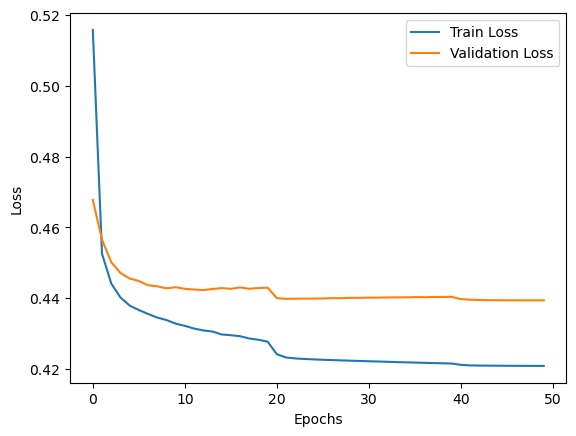

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
300/300 [==============================] - 6s 20ms/step - loss: 0.5032 - accuracy: 0.7938 - val_loss: 0.4526 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 2/50
300/300 [==============================] - 3s 9ms/step - loss: 0.4520 - accuracy: 0.8107 - val_loss: 0.4418 - val_accuracy: 0.8169 - lr: 0.0010
Epoch 3/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4448 - accuracy: 0.8134 - val_loss: 0.4365 - val_accuracy: 0.8192 - lr: 0.0010
Epoch 4/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4419 - accuracy: 0.8160 - val_loss: 0.4359 - val_accuracy: 0.8190 - lr: 0.0010
Epoch 5/50
300/300 [==============================] - 1s 4ms/step - loss: 0.4401 - accuracy: 0.8175 - val_loss: 0.4345 - val_accuracy: 0.8198 - lr: 0.0010
Epoch 6/50
300/300 [==============================] - 1s 5ms/step - loss: 0.

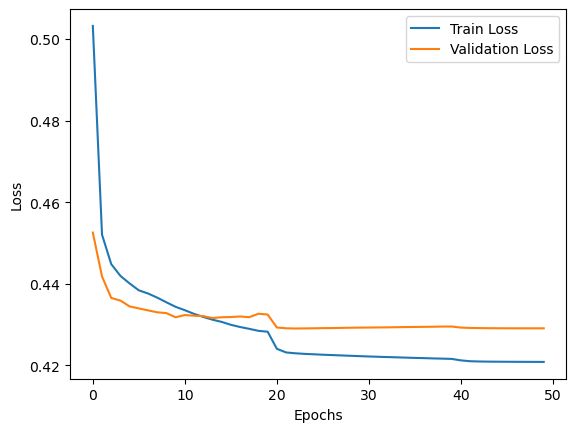

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
300/300 [==============================] - 6s 14ms/step - loss: 0.5283 - accuracy: 0.7722 - val_loss: 0.4620 - val_accuracy: 0.8110 - lr: 0.0010
Epoch 2/50
300/300 [==============================] - 2s 6ms/step - loss: 0.4518 - accuracy: 0.8121 - val_loss: 0.4489 - val_accuracy: 0.8163 - lr: 0.0010
Epoch 3/50
300/300 [==============================] - 2s 6ms/step - loss: 0.4427 - accuracy: 0.8172 - val_loss: 0.4449 - val_accuracy: 0.8175 - lr: 0.0010
Epoch 4/50
300/300 [==============================] - 2s 7ms/step - loss: 0.4388 - accuracy: 0.8192 - val_loss: 0.4435 - val_accuracy: 0.8190 - lr: 0.0010
Epoch 5/50
300/300 [==============================] - 2s 7ms/step - loss: 0.4368 - accuracy: 0.8186 - val_loss: 0.4434 - val_accuracy: 0.8196 - lr: 0.0010
Epoch 6/50
300/300 [==============================] - 2s 6ms/step - loss: 0.

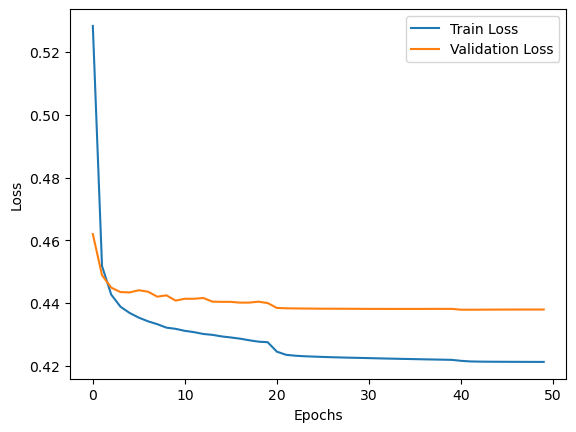

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
300/300 [==============================] - 5s 14ms/step - loss: 0.4899 - accuracy: 0.8008 - val_loss: 0.4538 - val_accuracy: 0.8090 - lr: 0.0010
Epoch 2/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4502 - accuracy: 0.8089 - val_loss: 0.4438 - val_accuracy: 0.8140 - lr: 0.0010
Epoch 3/50
300/300 [==============================] - 2s 6ms/step - loss: 0.4431 - accuracy: 0.8145 - val_loss: 0.4419 - val_accuracy: 0.8183 - lr: 0.0010
Epoch 4/50
300/300 [==============================] - 1s 4ms/step - loss: 0.4404 - accuracy: 0.8170 - val_loss: 0.4410 - val_accuracy: 0.8202 - lr: 0.0010
Epoch 5/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4390 - accuracy: 0.8186 - val_loss: 0.4396 - val_accuracy: 0.8206 - lr: 0.0010
Epoch 6/50
300/300 [==============================] - 1s 5ms/step - loss: 0.

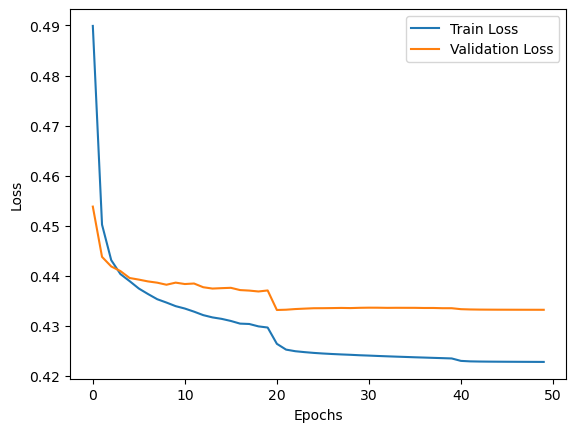

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
300/300 [==============================] - 2s 6ms/step - loss: 0.5134 - accuracy: 0.7872 - val_loss: 0.4685 - val_accuracy: 0.8037 - lr: 0.0010
Epoch 2/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4585 - accuracy: 0.8098 - val_loss: 0.4531 - val_accuracy: 0.8075 - lr: 0.0010
Epoch 3/50
300/300 [==============================] - 2s 5ms/step - loss: 0.4474 - accuracy: 0.8149 - val_loss: 0.4480 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 4/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4424 - accuracy: 0.8186 - val_loss: 0.4455 - val_accuracy: 0.8190 - lr: 0.0010
Epoch 5/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4398 - accuracy: 0.8198 - val_loss: 0.4451 - val_accuracy: 0.8200 - lr: 0.0010
Epoch 6/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4

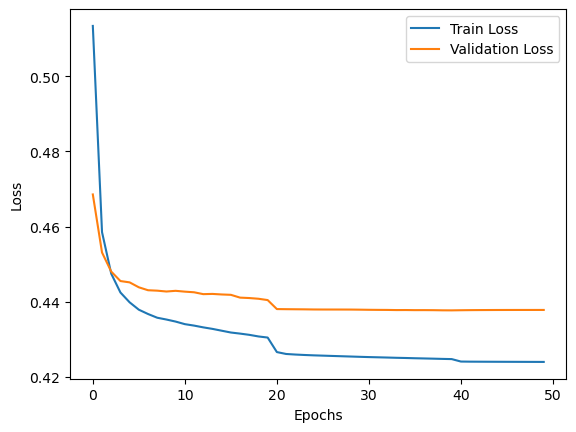

150/150 [==============================] - 0s 2ms/step
Configuration: filters=((16, 32))
Accuracy: 0.820 (+/- 0.002)
Precision: 0.666 (+/- 0.011)
Recall: 0.369 (+/- 0.017)
F1 score: 0.475 (+/- 0.014)
AUC score: 0.658 (+/- 0.007)

Best Configuration of filters:
(16, 32)
Best F1 Score: 0.47486178589541694


In [24]:
first_layer_filters = [16]


best_configuration = None
best_f1_score = 0.0

for filter in first_layer_filters:
            
    fold_no = 1
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    AUC_scores = []

    for train_index, test_index in kf.split(X_train, y_train):
        
        X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

        stacked_train, X_train_static, y_train_dl, stacked_test, X_test_static, y_test_dl = preprocess_data(X_train_dl,y_train_dl, X_test_dl, y_test_dl)
        
        # Build and compile LSTM model
        num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]
        
        # Define the LSTM model
        model = Sequential()
        model.add(Conv1D(filters=filter, kernel_size=5, activation='relu',padding='same', input_shape=(num_time_steps, num_features)))
        model.add(MaxPooling1D(pool_size=3))
        model.add(Conv1D(filters=filter*2, kernel_size=3, activation='relu',padding='same'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        
        initial_learning_rate = 0.001  # Initial learning rate
        decay_rate = 0.1  # Decay rate
        decay_steps = 20  # Decay steps (number of steps before applying decay)
        epochs = 50

        def learning_rate_scheduler(epoch):
            return initial_learning_rate * decay_rate ** (epoch // decay_steps)
        
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = initial_learning_rate), metrics=['accuracy'])
        
        lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
        
        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no}')
    
        # Train the model
        
        batch_size = 64
        
        # Train the model
        history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
        
        # Plot the loss on train vs validate tests
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        y_pred_probs = model.predict(stacked_test)
        y_pred = (y_pred_probs>=0.5).astype(int)    
        
        accuracy =  accuracy_score(y_test_dl,y_pred)
        precision = precision_score(y_test_dl,y_pred)
        recall = recall_score(y_test_dl,y_pred)
        f1 =  f1_score(y_test_dl,y_pred)
        AUC = roc_auc_score(y_test_dl,y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        AUC_scores.append(AUC)
        
        fold_no = fold_no + 1
    
    # Calculate the average F1 score for the current configuration
    average_f1_score = np.mean(f1_scores)

    # Print the scores for the current configuration
    print(f"Configuration: filters=({filter, filter*2})")
    print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
    print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
    print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
    print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
    print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))
    print()

    # Check if the current configuration has a higher average F1 score
    # If so, update the best configuration and best F1 score
    if average_f1_score > best_f1_score:
        best_configuration = (filter, filter*2)
        best_f1_score = average_f1_score


# Print the best configuration
print("Best Configuration of filters:")
print(best_configuration)
print("Best F1 Score:", best_f1_score)

In [23]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 6, 8)              128       
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 2, 8)             0         
 g1D)                                                            
                                                                 
 conv1d_29 (Conv1D)          (None, 2, 16)             400       
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 1, 16)            0         
 g1D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 1)               

### CNN Tuning Optimizer, lr, bs

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
300/300 [==============================] - 15s 47ms/step - loss: 0.5246 - accuracy: 0.7918 - val_loss: 0.4922 - val_accuracy: 0.7952 - lr: 0.0010
Epoch 2/50
300/300 [==============================] - 13s 45ms/step - loss: 0.4670 - accuracy: 0.8066 - val_loss: 0.4702 - val_accuracy: 0.7987 - lr: 0.0010
Epoch 3/50
300/300 [==============================] - 12s 39ms/step - loss: 0.4532 - accuracy: 0.8092 - val_loss: 0.4624 - val_accuracy: 0.8054 - lr: 0.0010
Epoch 4/50
300/300 [==============================] - 10s 32ms/step - loss: 0.4479 - accuracy: 0.8109 - val_loss: 0.4579 - val_accuracy: 0.8075 - lr: 0.0010
Epoch 5/50
300/300 [==============================] - 11s 37ms/step - loss: 0.4448 - accuracy: 0.8133 - val_loss: 0.4549 - val_accuracy: 0.8106 - lr: 0.0010
Epoch 6/50
300/300 [==============================] - 12s 39ms/step - loss: 0.4428 - accuracy: 0.8160 - val_loss: 0.4526 -

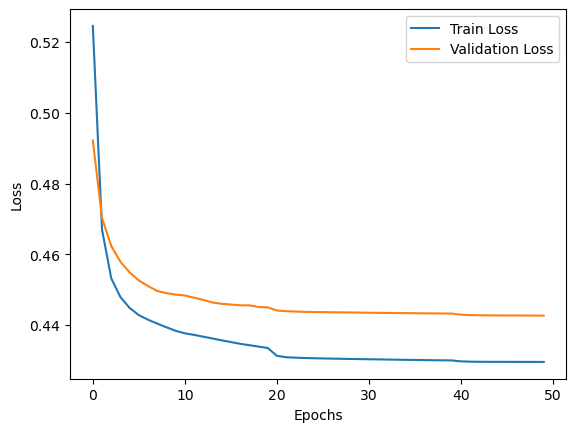

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
300/300 [==============================] - 15s 46ms/step - loss: 0.5063 - accuracy: 0.7944 - val_loss: 0.4617 - val_accuracy: 0.8094 - lr: 0.0010
Epoch 2/50
300/300 [==============================] - 14s 47ms/step - loss: 0.4630 - accuracy: 0.8018 - val_loss: 0.4506 - val_accuracy: 0.8117 - lr: 0.0010
Epoch 3/50
267/300 [=========================>....] - ETA: 1s - loss: 0.4554 - accuracy: 0.8039

300/300 [==============================] - 14s 47ms/step - loss: 0.4559 - accuracy: 0.8037 - val_loss: 0.4474 - val_accuracy: 0.8098 - lr: 0.0010
Epoch 4/50
300/300 [==============================] - 10s 34ms/step - loss: 0.4522 - accuracy: 0.8047 - val_loss: 0.4455 - val_accuracy: 0.8115 - lr: 0.0010
Epoch 5/50
300/300 [==============================] - 9s 32ms/step - loss: 0.4493 - accuracy: 0.8060 - val_loss: 0.4444 - val_accuracy: 0.8112 - lr: 0.0010
Epoch 6/50
300/300 [==============================] - 9s 32ms/step - loss: 0.4472 - accuracy: 0.8078 - val_loss: 0.4431 - val_accuracy: 0.8106 - lr: 0.0010
Epoch 7/50
300/300 [==============================] - 10s 33ms/step - loss: 0.4456 - accuracy: 0.8093 - val_loss: 0.4420 - val_accuracy: 0.8115 - lr: 0.0010
Epoch 8/50
300/300 [==============================] - 10s 33ms/step - loss: 0.4443 - accuracy: 0.8109 - val_loss: 0.4409 - val_accuracy: 0.8135 - lr: 0.0010
Epoch 9/50
300/300 [==============================] - 9s 30ms/step - lo

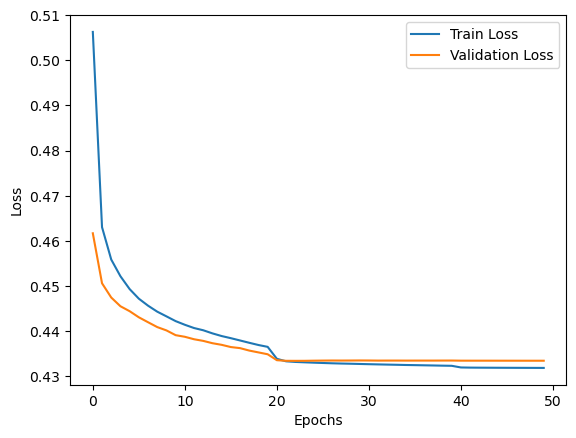

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
300/300 [==============================] - 14s 45ms/step - loss: 0.5110 - accuracy: 0.7976 - val_loss: 0.4689 - val_accuracy: 0.8110 - lr: 0.0010
Epoch 2/50
300/300 [==============================] - 10s 33ms/step - loss: 0.4572 - accuracy: 0.8085 - val_loss: 0.4512 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 3/50
300/300 [==============================] - 10s 32ms/step - loss: 0.4478 - accuracy: 0.8141 - val_loss: 0.4465 - val_accuracy: 0.8194 - lr: 0.0010
Epoch 4/50
300/300 [==============================] - 9s 31ms/step - loss: 0.4439 - accuracy: 0.8177 - val_loss: 0.4446 - val_accuracy: 0.8192 - lr: 0.0010
Epoch 5/50
300/300 [==============================] - 9s 31ms/step - loss: 0.4417 - accuracy: 0.8197 - val_loss: 0.4432 - val_accuracy: 0.8183 - lr: 0.0010
Epoch 6/50
300/300 [==============================] - 8s 28ms/step - 

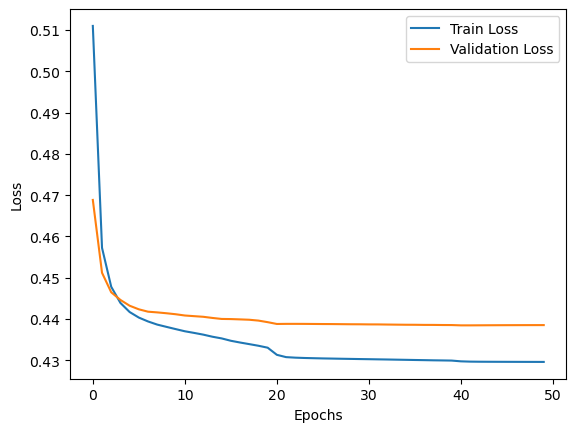

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
300/300 [==============================] - 10s 30ms/step - loss: 0.5033 - accuracy: 0.7947 - val_loss: 0.4640 - val_accuracy: 0.8060 - lr: 0.0010
Epoch 2/50
300/300 [==============================] - 13s 44ms/step - loss: 0.4563 - accuracy: 0.8048 - val_loss: 0.4508 - val_accuracy: 0.8092 - lr: 0.0010
Epoch 3/50
300/300 [==============================] - 13s 43ms/step - loss: 0.4496 - accuracy: 0.8065 - val_loss: 0.4476 - val_accuracy: 0.8110 - lr: 0.0010
Epoch 4/50
300/300 [==============================] - 13s 42ms/step - loss: 0.4468 - accuracy: 0.8083 - val_loss: 0.4454 - val_accuracy: 0.8135 - lr: 0.0010
Epoch 5/50
300/300 [==============================] - 12s 41ms/step - loss: 0.4446 - accuracy: 0.8127 - val_loss: 0.4437 - val_accuracy: 0.8181 - lr: 0.0010
Epoch 6/50
300/300 [==============================] - 13s 42ms/step

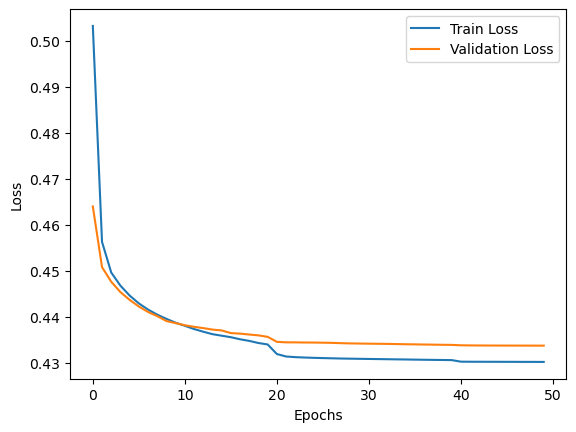

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
300/300 [==============================] - 13s 38ms/step - loss: 0.5039 - accuracy: 0.8011 - val_loss: 0.4765 - val_accuracy: 0.8040 - lr: 0.0010
Epoch 2/50
300/300 [==============================] - 12s 40ms/step - loss: 0.4587 - accuracy: 0.8094 - val_loss: 0.4620 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 3/50
300/300 [==============================] - 12s 41ms/step - loss: 0.4495 - accuracy: 0.8130 - val_loss: 0.4572 - val_accuracy: 0.8083 - lr: 0.0010
Epoch 4/50
300/300 [==============================] - 13s 43ms/step - loss: 0.4461 - accuracy: 0.8144 - val_loss: 0.4533 - val_accuracy: 0.8115 - lr: 0.0010
Epoch 5/50
300/300 [==============================] - 13s 44ms/step - loss: 0.4439 - accuracy: 0.8161 - val_loss: 0.4513 - val_accuracy: 0.8106 - lr: 0.0010
Epoch 6/50
300/300 [==============================] - 13s 43ms/step

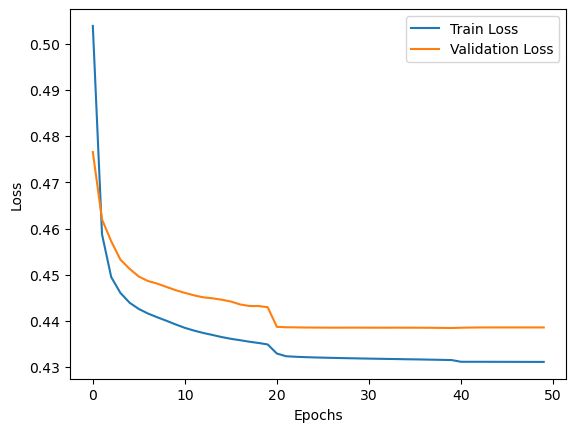

150/150 [==============================] - 0s 2ms/step
Configuration: Learning Rate=0.001, Optimizer=RMSprop,Batch Size =64
Accuracy: 0.819 (+/- 0.003)
Precision: 0.665 (+/- 0.012)
Recall: 0.367 (+/- 0.010)
F1 score: 0.472 (+/- 0.009)
AUC score: 0.657 (+/- 0.005)

Best Configuration (Learning Rate, Optimizer, Batch Size):
(0.001, <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x000001A6BDD8BD60>, 64)
Best F1 Score: 0.47244615223904773


In [22]:
initial_learning_rates = [0.001]
optimizers = ['rmsprop']
batches = [64]

best_configuration = None
best_f1_score = 0.0

for lr in initial_learning_rates:
    for optimizer in optimizers:
        for bs in batches:
            
            fold_no = 1
            accuracy_scores = []
            precision_scores = []
            recall_scores = []
            f1_scores = []
            AUC_scores = []
        
            for train_index, test_index in kf.split(X_train, y_train):
                
                X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
                y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

                stacked_train, X_train_static, y_train_dl, stacked_test, X_test_static, y_test_dl = preprocess_data(X_train_dl,y_train_dl, X_test_dl, y_test_dl)
                
                # Build and compile LSTM model
                num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]
                
                # Define the LSTM model
                model = Sequential()
                model.add(Conv1D(filters=8, kernel_size=5, activation='relu',padding='same', input_shape=(num_time_steps, num_features)))
                model.add(MaxPooling1D(pool_size=3))
                model.add(Conv1D(filters=16, padding='same', kernel_size=3, activation='relu'))
                model.add(MaxPooling1D(pool_size=2))
                model.add(Flatten())
                model.add(Dense(1, activation='sigmoid'))
                
                initial_learning_rate = lr  # Initial learning rate
                decay_rate = 0.1  # Decay rate
                decay_steps = 20  # Decay steps (number of steps before applying decay)
                epochs = 50

                def learning_rate_scheduler(epoch):
                    return initial_learning_rate * decay_rate ** (epoch // decay_steps)
                
                if optimizer == 'rmsprop':
                    optimizer = RMSprop(learning_rate=initial_learning_rate)
                elif optimizer == 'sgd':
                    optimizer = SGD(learning_rate=initial_learning_rate)
                elif optimizer == 'adamax':
                    optimizer = Adamax(learning_rate=initial_learning_rate)
                elif optimizer == 'adam':
                    optimizer = Adam(learning_rate=initial_learning_rate)
                
                
                model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
                
                lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
                
                print('------------------------------------------------------------------------')
                print(f'Training for fold {fold_no}')
            
                # Train the model
                batch_size = bs
                
                # Train the model
                history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
                
                # Plot the loss on train vs validate tests
                plt.plot(history.history['loss'], label='Train Loss')
                plt.plot(history.history['val_loss'], label='Validation Loss')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.show()
                
                y_pred_probs = model.predict(stacked_test)
                y_pred = (y_pred_probs>=0.5).astype(int)    
                
                accuracy =  accuracy_score(y_test_dl,y_pred)
                precision = precision_score(y_test_dl,y_pred)
                recall = recall_score(y_test_dl,y_pred)
                f1 =  f1_score(y_test_dl,y_pred)
                AUC = roc_auc_score(y_test_dl,y_pred)

                accuracy_scores.append(accuracy)
                precision_scores.append(precision)
                recall_scores.append(recall)
                f1_scores.append(f1)
                AUC_scores.append(AUC)
                
                fold_no = fold_no + 1
            
            # Calculate the average F1 score for the current configuration
            average_f1_score = np.mean(f1_scores)

            # Print the scores for the current configuration
            print(f"Configuration: Learning Rate={lr}, Optimizer={optimizer.get_config()['name']},Batch Size ={bs}")
            print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
            print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
            print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
            print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
            print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))
            print()
        
            # Check if the current configuration has a higher average F1 score
            # If so, update the best configuration and best F1 score
            if average_f1_score > best_f1_score:
                best_configuration = (lr, optimizer,batch_size)
                best_f1_score = average_f1_score


# Print the best configuration
print("Best Configuration (Learning Rate, Optimizer, Batch Size):")
print(best_configuration)
print("Best F1 Score:", best_f1_score)

## Hyperparameter Tuning - Static + Temporal features

### LSTM Tuning architectures - Only for architectures with f1 > 0.4 from stage 1

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
300/300 [==============================] - 4s 7ms/step - loss: 0.7544 - accuracy: 0.3235 - val_loss: 0.6955 - val_accuracy: 0.4994 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 2s 5ms/step - loss: 0.6344 - accuracy: 0.6845 - val_loss: 0.5750 - val_accuracy: 0.7742 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 2s 5ms/step - loss: 0.5284 - accuracy: 0.7889 - val_loss: 0.5028 - val_accuracy: 0.7915 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 2s 5ms/step - loss: 0.4890 - accuracy: 0.7951 - val_loss: 0.4875 - val_accuracy: 0.7935 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 2s 6ms/step - loss: 0.4787 - accuracy: 0.7974 - val_loss: 0.4810 - val_accuracy: 0.7937 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 2s 5ms/step - loss: 0.4723 - accuracy: 0.7986 - val_loss: 

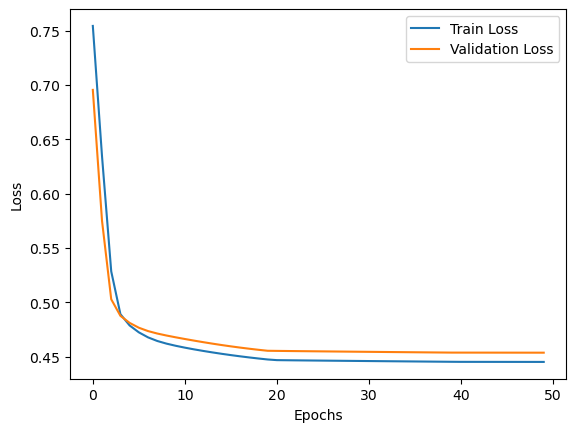

150/150 [==============================] - 1s 2ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
300/300 [==============================] - 3s 7ms/step - loss: 0.6496 - accuracy: 0.6280 - val_loss: 0.5907 - val_accuracy: 0.7331 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 1s 5ms/step - loss: 0.5503 - accuracy: 0.7634 - val_loss: 0.5115 - val_accuracy: 0.7881 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 1s 5ms/step - loss: 0.5019 - accuracy: 0.7914 - val_loss: 0.4866 - val_accuracy: 0.8012 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4870 - accuracy: 0.7966 - val_loss: 0.4769 - val_accuracy: 0.8023 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4789 - accuracy: 0.7989 - val_loss: 0.4705 - val_accuracy: 0.8015 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 2s 

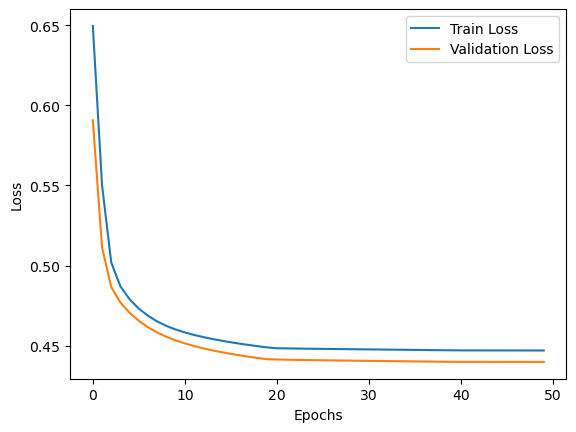

150/150 [==============================] - 1s 3ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
300/300 [==============================] - 3s 7ms/step - loss: 0.6782 - accuracy: 0.5668 - val_loss: 0.6122 - val_accuracy: 0.7663 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 2s 5ms/step - loss: 0.5604 - accuracy: 0.7825 - val_loss: 0.5167 - val_accuracy: 0.7990 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4995 - accuracy: 0.7942 - val_loss: 0.4884 - val_accuracy: 0.8010 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4839 - accuracy: 0.7958 - val_loss: 0.4798 - val_accuracy: 0.8021 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4764 - accuracy: 0.7968 - val_loss: 0.4733 - val_accuracy: 0.8031 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 1s 

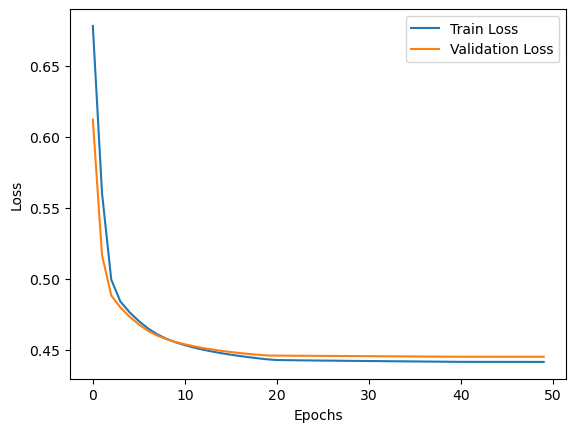

150/150 [==============================] - 1s 2ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
300/300 [==============================] - 3s 6ms/step - loss: 0.5878 - accuracy: 0.7710 - val_loss: 0.5386 - val_accuracy: 0.7902 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 1s 5ms/step - loss: 0.5090 - accuracy: 0.7971 - val_loss: 0.4873 - val_accuracy: 0.7946 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4810 - accuracy: 0.7989 - val_loss: 0.4750 - val_accuracy: 0.7956 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4733 - accuracy: 0.7997 - val_loss: 0.4694 - val_accuracy: 0.7985 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4690 - accuracy: 0.8000 - val_loss: 0.4656 - val_accuracy: 0.8002 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 1s 

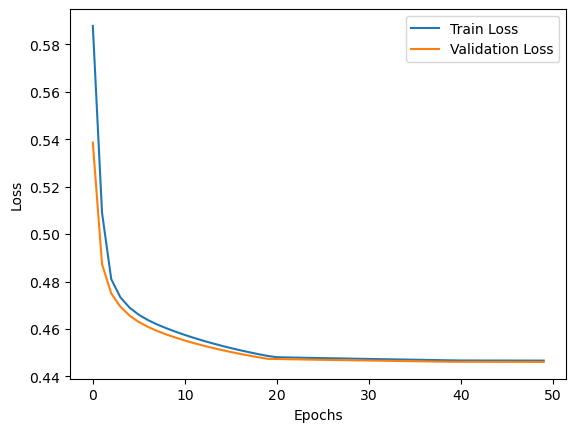

150/150 [==============================] - 1s 2ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
300/300 [==============================] - 4s 7ms/step - loss: 0.6910 - accuracy: 0.5453 - val_loss: 0.6178 - val_accuracy: 0.7379 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 1s 5ms/step - loss: 0.5643 - accuracy: 0.7720 - val_loss: 0.5179 - val_accuracy: 0.7852 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 2s 5ms/step - loss: 0.5003 - accuracy: 0.7928 - val_loss: 0.4880 - val_accuracy: 0.7919 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 2s 7ms/step - loss: 0.4847 - accuracy: 0.7968 - val_loss: 0.4812 - val_accuracy: 0.7960 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 2s 5ms/step - loss: 0.4790 - accuracy: 0.7978 - val_loss: 0.4765 - val_accuracy: 0.7971 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 2s 

In [25]:
# Grid search parameters
architectures = [
    {'hidden_layers': 1, 'units_per_layer': 16},
    {'hidden_layers': 1, 'units_per_layer': 32},
    {'hidden_layers': 2, 'units_per_layer': 16},
    {'hidden_layers': 1, 'units_per_layer': 64},
    {'hidden_layers': 2, 'units_per_layer': 32},
    {'hidden_layers': 1, 'units_per_layer': 256},
    {'hidden_layers': 1, 'units_per_layer': 128},
    {'hidden_layers': 2, 'units_per_layer': 64}
]

best_architecture = None
best_f1_score = 0.0

# Perform grid search
for architecture in architectures:
    fold_no = 1
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    AUC_scores = []
    
    for train_index, test_index in kf.split(X_train, y_train):
        
        X_train_dl, X_test_dl = X_train.iloc[train_index, :], X_train.iloc[test_index, :]
        y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

        stacked_train, X_train_static, y_train_dl, stacked_test, X_test_static, y_test_dl = preprocess_data(X_train_dl, y_train_dl, X_test_dl, y_test_dl)
        
        # Input layers
        num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]

        temporal_input = Input(shape=(num_time_steps, num_features), name='TEMPORAL_INPUT')
        static_input = Input(shape=(X_train_static.shape[1]), name='STATIC_INPUT')

        # LSTM layers
        lstm_layer = LSTM(architecture['units_per_layer'], return_sequences=True, name=f'LSTM_LAYER_1')(temporal_input)
        for i in range(1, architecture['hidden_layers']):
            lstm_layer = LSTM(architecture['units_per_layer'], return_sequences=True, name=f'LSTM_LAYER_{i + 1}')(lstm_layer)
        lstm_layer = Flatten(name='FLATTEN')(lstm_layer)

        # Concatenate LSTM layer with static input
        LSTM_combined = Concatenate(axis=1, name='LSTM_CONCAT')([lstm_layer, static_input])
        output = Dense(1, activation='sigmoid', name='LSTM_OUTPUT_LAYER')(LSTM_combined)

        model = Model(inputs=[temporal_input, static_input], outputs=[output])

        initial_learning_rate = 0.0001
        decay_rate = 0.1
        decay_steps = 20
        batch_size = 64
        epochs = 50

        def learning_rate_scheduler(epoch):
            return initial_learning_rate * decay_rate ** (epoch // decay_steps)

        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])
        
        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no}')

        lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
        history = model.fit([stacked_train, X_train_static], y_train_dl,
                                                epochs=epochs, batch_size=batch_size,
                                                validation_data=([stacked_test, X_test_static], y_test_dl),
                                                shuffle=False, callbacks=[lr_scheduler])

        # Plot the loss on train vs validate tests
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        # Make predictions on the test set
        y_pred_probs = model.predict([stacked_test, X_test_static])
        y_pred = (y_pred_probs >= 0.5).astype(int)

        accuracy = accuracy_score(y_test_dl, y_pred)
        precision = precision_score(y_test_dl, y_pred)
        recall = recall_score(y_test_dl, y_pred)
        f1 = f1_score(y_test_dl, y_pred)
        AUC = roc_auc_score(y_test_dl, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        AUC_scores.append(AUC)

        fold_no = fold_no + 1

    # Calculate the average F1 score for the current architecture
    average_f1_score = np.mean(f1_scores)

    # Print the scores for the current architecture
    print(f"Architecture: {architecture['hidden_layers']} LSTM layers, {architecture['units_per_layer']} units")
    print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
    print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
    print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
    print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
    print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))
    print()

    # Check if the current architecture has a higher average F1 score
    # If so, update the best architecture and best F1 score
    if average_f1_score > best_f1_score:
        best_architecture = architecture
        best_f1_score = average_f1_score

# Print the best architecture
print("Best Architecture:")
print(best_architecture)
print("Best F1 Score:", best_f1_score)


## Results on test set

### Preprocessing on the train - test set before prediction

In [24]:
X_train_temporal, X_train_static, y_train_preprocessed, X_test_temporal, X_test_static, y_test_preprocessed = preprocess_data(X_train, y_train, X_test, y_test)

### Performance on temporal feature extraction

#### LSTM

Epoch 1/50
750/750 [==============================] - 12s 12ms/step - loss: 0.5167 - accuracy: 0.7881 - val_loss: 0.4792 - val_accuracy: 0.8000 - lr: 1.0000e-04
Epoch 2/50
750/750 [==============================] - 9s 12ms/step - loss: 0.4710 - accuracy: 0.7975 - val_loss: 0.4649 - val_accuracy: 0.8005 - lr: 1.0000e-04
Epoch 3/50
750/750 [==============================] - 9s 12ms/step - loss: 0.4633 - accuracy: 0.7992 - val_loss: 0.4604 - val_accuracy: 0.8020 - lr: 1.0000e-04
Epoch 4/50
750/750 [==============================] - 8s 10ms/step - loss: 0.4590 - accuracy: 0.8005 - val_loss: 0.4579 - val_accuracy: 0.8040 - lr: 1.0000e-04
Epoch 5/50
750/750 [==============================] - 8s 11ms/step - loss: 0.4558 - accuracy: 0.8020 - val_loss: 0.4561 - val_accuracy: 0.8048 - lr: 1.0000e-04
Epoch 6/50
750/750 [==============================] - 8s 11ms/step - loss: 0.4531 - accuracy: 0.8040 - val_loss: 0.4545 - val_accuracy: 0.8040 - lr: 1.0000e-04
Epoch 7/50
750/750 [===================

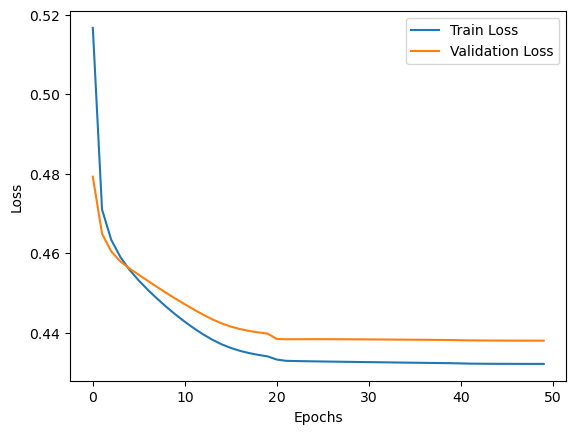

188/188 [==============================] - 2s 5ms/step


In [25]:
# Build and compile LSTM lstm_temporal
num_time_steps, num_features = X_train_temporal.shape[1], X_train_temporal.shape[2]

# Define the LSTM lstm_temporal
lstm_temporal = Sequential()
lstm_temporal.add(LSTM(64,return_sequences=True, input_shape=(num_time_steps, num_features)))
lstm_temporal.add(LSTM(64,return_sequences = True))
lstm_temporal.add(Flatten())
lstm_temporal.add(Dense(1, activation='sigmoid'))

initial_learning_rate = 0.0001  # Initial learning rate
decay_rate = 0.1  # Decay rate
decay_steps = 20  # Decay steps (number of steps before applying decay)
epochs = 50

def learning_rate_scheduler(epoch):
    return initial_learning_rate * decay_rate ** (epoch // decay_steps)


lstm_temporal.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

# Train the lstm_temporal
batch_size = 32

# Train the lstm_temporal
history = lstm_temporal.fit(X_train_temporal, y_train_preprocessed, epochs=epochs, batch_size=batch_size, validation_data=(X_test_temporal, y_test_preprocessed),shuffle=False,callbacks=[lr_scheduler])

# Plot the loss on train vs validate tests
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred_probs_lstm_temp = lstm_temporal.predict(X_test_temporal)
y_pred_lstm_temp = (y_pred_probs_lstm_temp>=0.5).astype(int)    

accuracy =  accuracy_score(y_test_preprocessed,y_pred_lstm_temp)
precision = precision_score(y_test_preprocessed,y_pred_lstm_temp)
recall = recall_score(y_test_preprocessed,y_pred_lstm_temp)
f1 =  f1_score(y_test_preprocessed,y_pred_lstm_temp)
AUC = roc_auc_score(y_test_preprocessed,y_pred_lstm_temp)



In [26]:
print('LSTM Accuracy on temporal: %.3f' % accuracy)
print('LSTM Precision on temporal: %.3f' % precision)
print('LSTM Recall on temporal: %.3f' % recall)
print('LSTM F1 score on temporal: %.3f' % f1)
print('LSTM AUC score on temporal: %.3f' % AUC)

LSTM Accuracy on temporal: 0.816
LSTM Precision on temporal: 0.644
LSTM Recall on temporal: 0.379
LSTM F1 score on temporal: 0.477
LSTM AUC score on temporal: 0.660


#### RNN

Epoch 1/50
750/750 [==============================] - 8s 8ms/step - loss: 0.4961 - accuracy: 0.7821 - val_loss: 0.4625 - val_accuracy: 0.7990 - lr: 1.0000e-04
Epoch 2/50
750/750 [==============================] - 6s 8ms/step - loss: 0.4552 - accuracy: 0.8036 - val_loss: 0.4526 - val_accuracy: 0.8047 - lr: 1.0000e-04
Epoch 3/50
750/750 [==============================] - 6s 7ms/step - loss: 0.4476 - accuracy: 0.8075 - val_loss: 0.4494 - val_accuracy: 0.8107 - lr: 1.0000e-04
Epoch 4/50
750/750 [==============================] - 6s 7ms/step - loss: 0.4440 - accuracy: 0.8106 - val_loss: 0.4476 - val_accuracy: 0.8120 - lr: 1.0000e-04
Epoch 5/50
750/750 [==============================] - 6s 7ms/step - loss: 0.4418 - accuracy: 0.8121 - val_loss: 0.4464 - val_accuracy: 0.8105 - lr: 1.0000e-04
Epoch 6/50
750/750 [==============================] - 6s 8ms/step - loss: 0.4402 - accuracy: 0.8133 - val_loss: 0.4453 - val_accuracy: 0.8105 - lr: 1.0000e-04
Epoch 7/50
750/750 [==========================

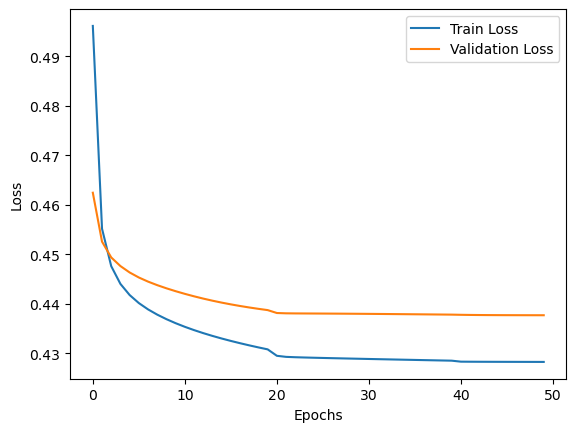

188/188 [==============================] - 2s 5ms/step
RNN Accuracy on temporal: 0.816
RNN Precision on temporal: 0.646
RNN Recall on temporal: 0.369
RNN F1 score on temporal: 0.470
RNN AUC score on temporal: 0.656


In [29]:
# Build and compile rnn_temporal
num_time_steps, num_features = X_train_temporal.shape[1], X_train_temporal.shape[2]

# Define the rnn_temporal
rnn_temporal = Sequential()
rnn_temporal.add(SimpleRNN(32,return_sequences=True, input_shape=(num_time_steps, num_features)))
rnn_temporal.add(SimpleRNN(32,return_sequences = True))
rnn_temporal.add(SimpleRNN(32,return_sequences = True))
rnn_temporal.add(Flatten())
rnn_temporal.add(Dense(1, activation='sigmoid'))

initial_learning_rate = 0.0001  # Initial learning rate
decay_rate = 0.1  # Decay rate
decay_steps = 20  # Decay steps (number of steps before applying decay)
epochs = 50

def learning_rate_scheduler(epoch):
    return initial_learning_rate * decay_rate ** (epoch // decay_steps)


rnn_temporal.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=initial_learning_rate), metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

# Train the rnn_temporal
batch_size = 32

# Train the rnn_temporal
history_rnn_temp = rnn_temporal.fit(X_train_temporal, y_train_preprocessed, epochs=epochs, batch_size=batch_size, validation_data=(X_test_temporal, y_test_preprocessed),shuffle=False,callbacks=[lr_scheduler])

# Plot the loss on train vs validate tests
plt.plot(history_rnn_temp.history['loss'], label='Train Loss')
plt.plot(history_rnn_temp.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred_probs_rnn_temp = rnn_temporal.predict(X_test_temporal)
y_pred_rnn_temp = (y_pred_probs_rnn_temp>=0.5).astype(int)    

accuracy_rnn_temp =  accuracy_score(y_test_preprocessed,y_pred_rnn_temp)
precision_rnn_temp = precision_score(y_test_preprocessed,y_pred_rnn_temp)
recall_rnn_temp = recall_score(y_test_preprocessed,y_pred_rnn_temp)
f1_rnn_temp =  f1_score(y_test_preprocessed,y_pred_rnn_temp)
AUC_rnn_temp = roc_auc_score(y_test_preprocessed,y_pred_rnn_temp)

print('RNN Accuracy on temporal: %.3f' % accuracy_rnn_temp)
print('RNN Precision on temporal: %.3f' % precision_rnn_temp)
print('RNN Recall on temporal: %.3f' % recall_rnn_temp)
print('RNN F1 score on temporal: %.3f' % f1_rnn_temp)
print('RNN AUC score on temporal: %.3f' % AUC_rnn_temp)



#### CNN

### Performance assessment after concatenation layer

In [30]:
num_time_steps, num_features = X_train_temporal.shape[1], X_train_temporal.shape[2]

temporal_input = Input(shape=(num_time_steps, num_features),name = 'TEMPORAL_INPUT')
static_input = Input(shape=(X_train_static.shape[1]),name = 'STATIC_INPUT')

#### LSTM

Epoch 1/50
750/750 [==============================] - 17s 17ms/step - loss: 0.5222 - accuracy: 0.7615 - val_loss: 0.4795 - val_accuracy: 0.7995 - lr: 1.0000e-04
Epoch 2/50
750/750 [==============================] - 11s 15ms/step - loss: 0.4724 - accuracy: 0.7977 - val_loss: 0.4654 - val_accuracy: 0.8005 - lr: 1.0000e-04
Epoch 3/50
750/750 [==============================] - 11s 15ms/step - loss: 0.4639 - accuracy: 0.7996 - val_loss: 0.4598 - val_accuracy: 0.8035 - lr: 1.0000e-04
Epoch 4/50
750/750 [==============================] - 10s 14ms/step - loss: 0.4583 - accuracy: 0.8009 - val_loss: 0.4565 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 5/50
750/750 [==============================] - 10s 14ms/step - loss: 0.4543 - accuracy: 0.8038 - val_loss: 0.4544 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 6/50
750/750 [==============================] - 10s 13ms/step - loss: 0.4512 - accuracy: 0.8049 - val_loss: 0.4526 - val_accuracy: 0.8037 - lr: 1.0000e-04
Epoch 7/50
750/750 [==============

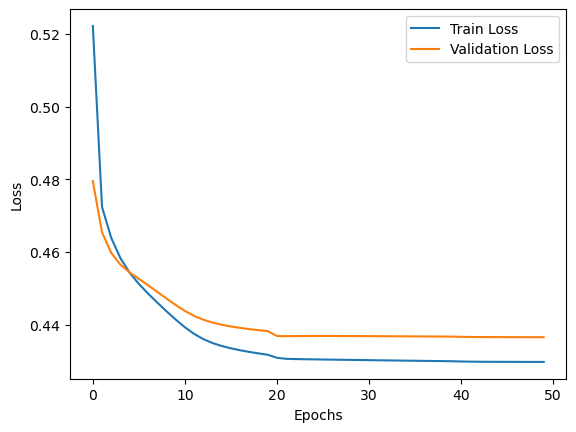

188/188 [==============================] - 2s 6ms/step
LSTM Accuracy after concatenation: 0.816
LSTM Precision after concatenation: 0.645
LSTM Recall after concatenation: 0.377
LSTM F1 score after concatenation: 0.476
LSTM AUC score after concatenation: 0.659


In [31]:
#Build and compile lstm_conc_model

lstm_layer = LSTM(64,return_sequences=True, name = 'LSTM_LAYER_1')(temporal_input)
lstm_layer = LSTM(64,return_sequences=True, name = 'LSTM_LAYER_2')(lstm_layer)
lstm_layer = Flatten(name = 'FLATTEN')(lstm_layer)

LSTM_combined = Concatenate(axis=1, name ='LSTM_CONCAT')([lstm_layer,static_input])
output = Dense(1,activation='sigmoid',name='LSTM_OUTPUT_LAYER')(LSTM_combined)

lstm_conc_model = Model(inputs=[temporal_input,static_input],outputs=[output])


initial_learning_rate = 0.0001  # Initial learning rate
decay_rate = 0.1  # Decay rate
decay_steps = 20  # Decay steps (number of steps before applying decay)
epochs = 50

def learning_rate_scheduler(epoch):
    return initial_learning_rate * decay_rate ** (epoch // decay_steps)


lstm_conc_model.compile(loss='binary_crossentropy', optimizer= Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

#Train the model
batch_size = 32    

history_lstm_conc = lstm_conc_model.fit([X_train_temporal, X_train_static], y_train_preprocessed, epochs=epochs, batch_size=batch_size, validation_data=([X_test_temporal, X_test_static], y_test_preprocessed),shuffle=False,callbacks = [lr_scheduler])

# Plot the loss on train vs validate tests
plt.plot(history_lstm_conc.history['loss'], label='Train Loss')
plt.plot(history_lstm_conc.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Make predictions on the test set    
y_pred_probs_lstm_conc = lstm_conc_model.predict([X_test_temporal, X_test_static])
y_pred_lstm_conc = (y_pred_probs_lstm_conc>=0.5).astype(int)    

accuracy_lstm_conc =  accuracy_score(y_test_preprocessed,y_pred_lstm_conc)
precision_lstm_conc = precision_score(y_test_preprocessed,y_pred_lstm_conc)
recall_lstm_conc = recall_score(y_test_preprocessed,y_pred_lstm_conc)
f1_lstm_conc =  f1_score(y_test_preprocessed,y_pred_lstm_conc)
AUC_lstm_conc= roc_auc_score(y_test_preprocessed,y_pred_lstm_conc)

print('LSTM Accuracy after concatenation: %.3f' % accuracy_lstm_conc)
print('LSTM Precision after concatenation: %.3f' % precision_lstm_conc)
print('LSTM Recall after concatenation: %.3f' % recall_lstm_conc)
print('LSTM F1 score after concatenation: %.3f' % f1_lstm_conc)
print('LSTM AUC score after concatenation: %.3f' % AUC_lstm_conc)



#### RNN

Epoch 1/50
750/750 [==============================] - 11s 11ms/step - loss: 0.4887 - accuracy: 0.7849 - val_loss: 0.4599 - val_accuracy: 0.8025 - lr: 1.0000e-04
Epoch 2/50
750/750 [==============================] - 7s 10ms/step - loss: 0.4523 - accuracy: 0.8055 - val_loss: 0.4527 - val_accuracy: 0.8067 - lr: 1.0000e-04
Epoch 3/50
750/750 [==============================] - 7s 10ms/step - loss: 0.4466 - accuracy: 0.8088 - val_loss: 0.4498 - val_accuracy: 0.8065 - lr: 1.0000e-04
Epoch 4/50
750/750 [==============================] - 7s 10ms/step - loss: 0.4435 - accuracy: 0.8112 - val_loss: 0.4481 - val_accuracy: 0.8088 - lr: 1.0000e-04
Epoch 5/50
750/750 [==============================] - 7s 10ms/step - loss: 0.4413 - accuracy: 0.8121 - val_loss: 0.4467 - val_accuracy: 0.8090 - lr: 1.0000e-04
Epoch 6/50
750/750 [==============================] - 8s 10ms/step - loss: 0.4397 - accuracy: 0.8133 - val_loss: 0.4456 - val_accuracy: 0.8105 - lr: 1.0000e-04
Epoch 7/50
750/750 [===================

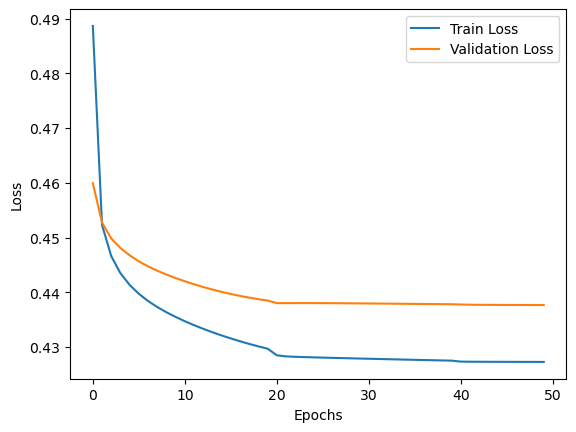

188/188 [==============================] - 1s 4ms/step
RNN Accuracy after concatenation: 0.816
RNN Precision after concatenation: 0.644
RNN Recall after concatenation: 0.372
RNN F1 score after concatenation: 0.471
RNN AUC score after concatenation: 0.657


In [32]:
#Build and compile rnn_conc_model

rnn_layer = SimpleRNN(32,return_sequences=True, name = 'rnn_LAYER_1')(temporal_input)
rnn_layer = SimpleRNN(32,return_sequences=True, name = 'rnn_LAYER_2')(rnn_layer)
rnn_layer = SimpleRNN(32,return_sequences=True, name = 'rnn_LAYER_3')(rnn_layer)
rnn_layer = Flatten(name = 'rnn_FLATTEN')(rnn_layer)

RNN_combined = Concatenate(axis=1, name ='RNN_CONCAT')([rnn_layer,static_input])
RNN_output = Dense(1,activation='sigmoid',name='RNN_OUTPUT_LAYER')(RNN_combined)

rnn_conc_model = Model(inputs=[temporal_input,static_input],outputs=[RNN_output])


initial_learning_rate = 0.0001  # Initial learning rate
decay_rate = 0.1  # Decay rate
decay_steps = 20  # Decay steps (number of steps before applying decay)
epochs = 50

def learning_rate_scheduler(epoch):
    return initial_learning_rate * decay_rate ** (epoch // decay_steps)


rnn_conc_model.compile(loss='binary_crossentropy', optimizer= RMSprop(learning_rate=initial_learning_rate), metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

#Train the model
batch_size = 32    

history_rnn_conc = rnn_conc_model.fit([X_train_temporal, X_train_static], y_train_preprocessed, epochs=epochs, batch_size=batch_size, validation_data=([X_test_temporal, X_test_static], y_test_preprocessed),shuffle=False,callbacks = [lr_scheduler])

# Plot the loss on train vs validate tests
plt.plot(history_rnn_conc.history['loss'], label='Train Loss')
plt.plot(history_rnn_conc.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Make predictions on the test set    
y_pred_probs_rnn_conc = rnn_conc_model.predict([X_test_temporal, X_test_static])
y_pred_rnn_conc = (y_pred_probs_rnn_conc>=0.5).astype(int)    

accuracy_rnn_conc =  accuracy_score(y_test_preprocessed,y_pred_rnn_conc)
precision_rnn_conc = precision_score(y_test_preprocessed,y_pred_rnn_conc)
recall_rnn_conc = recall_score(y_test_preprocessed,y_pred_rnn_conc)
f1_rnn_conc =  f1_score(y_test_preprocessed,y_pred_rnn_conc)
AUC_rnn_conc= roc_auc_score(y_test_preprocessed,y_pred_rnn_conc)

print('RNN Accuracy after concatenation: %.3f' % accuracy_rnn_conc)
print('RNN Precision after concatenation: %.3f' % precision_rnn_conc)
print('RNN Recall after concatenation: %.3f' % recall_rnn_conc)
print('RNN F1 score after concatenation: %.3f' % f1_rnn_conc)
print('RNN AUC score after concatenation: %.3f' % AUC_rnn_conc)



#### CNN

### Performance after classification models

In [33]:
def final_prediction(X_train_temp,X_test_temp,X_train_st, X_test_st,y_train_prep,y_test_prep,model, feature_extractor_model, layer_name):
    
    extractor_model = Model(inputs=feature_extractor_model.input, outputs=feature_extractor_model.get_layer(name=layer_name).output)
    customers_vector = extractor_model.predict([X_train_temp,X_train_st])
    customers_test = extractor_model.predict([X_test_temp,X_test_st])
    reshaped_customers_vector = customers_vector.reshape(customers_vector.shape[0], -1)
    reshaped_customers_test = customers_test.reshape(customers_test.shape[0], -1) 
    final_model = model
    final_model.fit(reshaped_customers_vector, y_train_prep)
    preds = final_model.predict(reshaped_customers_test)
    
    accuracy = accuracy_score(y_test_prep, preds)
    precision = precision_score(y_test_prep, preds)
    recall = recall_score(y_test_prep, preds)
    f1 = f1_score(y_test_prep, preds)
    auc = roc_auc_score(y_test_prep, preds)

    print(f"Metrics for {feature_extractor_model.name} + {model}:")
    print('Accuracy: %.3f' % accuracy)
    print('Precision: %.3f' % precision)
    print('Recall: %.3f' % recall)
    print('F1 score: %.3f' % f1)
    print('AUC score: %.3f' % auc)

#### LSTM

In [34]:
lstm_temporal.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 6, 64)             33024     
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 1)                 385       
                                                                 
Total params: 50,817
Trainable params: 50,817
Non-trainable params: 0
_________________________________________________________________


##### LSTM + LR

In [35]:
final_prediction(X_train_temp=X_train_temporal,X_test_temp=X_test_temporal,X_train_st=X_train_static,X_test_st= X_test_static,y_train_prep=y_train_preprocessed,y_test_prep=y_test_preprocessed,model = LogisticRegression(max_iter=500), feature_extractor_model = lstm_conc_model, layer_name='LSTM_CONCAT')

188/188 [==============================] - 2s 7ms/step
Metrics for model + LogisticRegression(max_iter=500):
Accuracy: 0.818
Precision: 0.661
Recall: 0.362
F1 score: 0.468
AUC score: 0.655


##### LSTM + XGB

In [36]:
final_prediction(X_train_temporal,X_test_temporal,X_train_static, X_test_static,y_train_preprocessed,y_test_preprocessed,model = XGBClassifier(), feature_extractor_model = lstm_conc_model, layer_name='LSTM_CONCAT')

188/188 [==============================] - 2s 7ms/step
Metrics for model + XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...):
Accuracy: 0.807
Precision: 0.612
Recall: 0.349
F1 score: 0.445
AUC score: 0.643


##### LSTM + RF

In [37]:
final_prediction(X_train_temporal,X_test_temporal,X_train_static, X_test_static,y_train_preprocessed,y_test_preprocessed,model = RandomForestClassifier(), feature_extractor_model = lstm_conc_model, layer_name='LSTM_CONCAT')

188/188 [==============================] - 2s 8ms/step
Metrics for model + RandomForestClassifier():
Accuracy: 0.803
Precision: 0.588
Recall: 0.365
F1 score: 0.450
AUC score: 0.646


### RNN

In [38]:
rnn_conc_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 TEMPORAL_INPUT (InputLayer)    [(None, 6, 3)]       0           []                               
                                                                                                  
 rnn_LAYER_1 (SimpleRNN)        (None, 6, 32)        1152        ['TEMPORAL_INPUT[0][0]']         
                                                                                                  
 rnn_LAYER_2 (SimpleRNN)        (None, 6, 32)        2080        ['rnn_LAYER_1[0][0]']            
                                                                                                  
 rnn_LAYER_3 (SimpleRNN)        (None, 6, 32)        2080        ['rnn_LAYER_2[0][0]']            
                                                                                            

##### RNN + LR

In [39]:
final_prediction(X_train_temp=X_train_temporal,X_test_temp=X_test_temporal,X_train_st=X_train_static,X_test_st= X_test_static,y_train_prep=y_train_preprocessed,y_test_prep=y_test_preprocessed,model = LogisticRegression(max_iter=500), feature_extractor_model = rnn_conc_model, layer_name='RNN_CONCAT')

188/188 [==============================] - 1s 4ms/step
Metrics for model_1 + LogisticRegression(max_iter=500):
Accuracy: 0.816
Precision: 0.648
Recall: 0.365
F1 score: 0.467
AUC score: 0.654


##### RNN + XGB

In [40]:
final_prediction(X_train_temporal,X_test_temporal,X_train_static, X_test_static,y_train_preprocessed,y_test_preprocessed,model = XGBClassifier(), feature_extractor_model = rnn_conc_model, layer_name='RNN_CONCAT')

188/188 [==============================] - 1s 5ms/step
Metrics for model_1 + XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...):
Accuracy: 0.805
Precision: 0.600
Recall: 0.354
F1 score: 0.445
AUC score: 0.644


##### RNN + RF

In [41]:
final_prediction(X_train_temporal,X_test_temporal,X_train_static, X_test_static,y_train_preprocessed,y_test_preprocessed,model = RandomForestClassifier(), feature_extractor_model = rnn_conc_model, layer_name='RNN_CONCAT')

188/188 [==============================] - 1s 4ms/step
Metrics for model_1 + RandomForestClassifier():
Accuracy: 0.807
Precision: 0.604
Recall: 0.372
F1 score: 0.461
AUC score: 0.651


#### CNN

##### CNN + LR

##### CNN + XGB

##### CNN + RF

#### Classification models on test set

##### LR

In [43]:
lr_prep = PreprocessorTransformer(columns = ohe_cols, columns_num= numerical_cols,drop='first',handle_unknown='ignore',sparse_output=False)
X_train_LR = lr_prep.fit_transform(X_train)
X_test_LR = lr_prep.transform(X_test)

In [44]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_LR, y_train)
lr_predictions = lr_model.predict(X_test_LR)

accuracy_LR = accuracy_score(y_test, lr_predictions)
precision_LR = precision_score(y_test, lr_predictions)
recall_LR = recall_score(y_test, lr_predictions)
f1_LR = f1_score(y_test, lr_predictions)
auc_LR = roc_auc_score(y_test, lr_predictions)

print("Accuracy of LR:", accuracy_LR)
print("Precision of LR:", precision_LR)
print("Recall of LR:", recall_LR)
print("F1 Score of LR:", f1_LR)
print('AUC of LR', auc_LR)

Accuracy of LR: 0.8163333333333334
Precision of LR: 0.6595744680851063
Recall of LR: 0.35041446872645066
F1 Score of LR: 0.4576771653543307
AUC of LR 0.6495277993107964


In [45]:
# Make predictions on the training set
lr_train_predictions = lr_model.predict(X_train_LR)

# Calculate evaluation metrics on the training set
accuracy_LR_train = accuracy_score(y_train, lr_train_predictions)
precision_LR_train = precision_score(y_train, lr_train_predictions)
recall_LR_train = recall_score(y_train, lr_train_predictions)
f1_LR_train = f1_score(y_train, lr_train_predictions)
auc_LR_train = roc_auc_score(y_train, lr_train_predictions)

# Print the scores on the training set
print("Accuracy of LR on training set:", accuracy_LR_train)
print("Precision of LR on training set:", precision_LR_train)
print("Recall of LR on training set:", recall_LR_train)
print("F1 Score of LR on training set:", f1_LR_train)
print('AUC of LR on training set:', auc_LR_train)

Accuracy of LR on training set: 0.8220833333333334
Precision of LR on training set: 0.6858676207513417
Recall of LR on training set: 0.3610849500847617
F1 Score of LR on training set: 0.47309970384995065
AUC of LR on training set: 0.6570552351943256


##### XGB

In [42]:
ohe_new = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False), ohe_cols)
], remainder='passthrough')
X_train_tree = ohe_new.fit_transform(X_train)
X_test_tree = ohe_new.transform(X_test)

In [46]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_tree, y_train)
xgb_predictions = xgb_model.predict(X_test_tree)

accuracy_xgb = accuracy_score(y_test, xgb_predictions)
precision_xgb = precision_score(y_test, xgb_predictions)
recall_xgb = recall_score(y_test, xgb_predictions)
f1_xgb = f1_score(y_test, xgb_predictions)
auc_xgb = roc_auc_score(y_test, xgb_predictions)

print("Accuracy of XGB:", accuracy_xgb)
print("Precision of XGB:", precision_xgb)
print("Recall of XGB:", recall_xgb)
print("F1 Score of XGB:", f1_xgb)
print('AUC of XGB', auc_xgb)

Accuracy of XGB: 0.8126666666666666
Precision of XGB: 0.6323337679269883
Recall of XGB: 0.3654860587792012
F1 Score of XGB: 0.46322827125119387
AUC of XGB 0.6525696932029967


In [49]:
# Make predictions on the training data using the XGBoost model
xgb_train_predictions = xgb_model.predict(X_train_tree)

# Calculate evaluation metrics on the training set
accuracy_train_xgb = accuracy_score(y_train, xgb_train_predictions)
precision_train_xgb = precision_score(y_train, xgb_train_predictions)
recall_train_xgb = recall_score(y_train, xgb_train_predictions)
f1_train_xgb = f1_score(y_train, xgb_train_predictions)
auc_train_xgb = roc_auc_score(y_train, xgb_train_predictions)

# Print the metrics on the training set
print("Metrics on the Training Set:")
print("Accuracy:", accuracy_train_xgb)
print("Precision:", precision_train_xgb)
print("Recall:", recall_train_xgb)
print("F1 Score:", f1_train_xgb)
print("AUC:", auc_train_xgb)


Metrics on the Training Set:
Accuracy: 0.8841666666666667
Precision: 0.8793879387938794
Recall: 0.5520813712563571
F1 Score: 0.6783152048137007
AUC: 0.765286846882258


##### RF

In [47]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tree, y_train)
rf_predictions = rf_model.predict(X_test_tree)

accuracy_RF = accuracy_score(y_test, rf_predictions)
precision_RF = precision_score(y_test, rf_predictions)
recall_RF = recall_score(y_test, rf_predictions)
f1_RF = f1_score(y_test, rf_predictions)
auc_RF = roc_auc_score(y_test, rf_predictions)

print("Accuracy of RF:", accuracy_RF)
print("Precision of RF:", precision_RF)
print("Recall of RF:", recall_RF)
print("F1 Score of RF:", f1_RF)
print('AUC of RF', auc_RF)

Accuracy of RF: 0.8118333333333333
Precision of RF: 0.6337837837837837
Recall of RF: 0.35342878673700073
F1 Score of RF: 0.4537977745524915
AUC of RF 0.6477180312884661


In [48]:
rf_train_predictions = rf_model.predict(X_train_tree)

# Calculate evaluation metrics on the training set
accuracy_RF_train = accuracy_score(y_train, rf_train_predictions)
precision_RF_train = precision_score(y_train, rf_train_predictions)
recall_RF_train = recall_score(y_train, rf_train_predictions)
f1_RF_train = f1_score(y_train, rf_train_predictions)
auc_RF_train = roc_auc_score(y_train, rf_train_predictions)

# Print the scores on the training set
print("Accuracy of RF on training set:", accuracy_RF_train)
print("Precision of RF on training set:", precision_RF_train)
print("Recall of RF on training set:", recall_RF_train)
print("F1 Score of RF on training set:", f1_RF_train)
print('AUC of RF on training set:', auc_RF_train)

Accuracy of RF on training set: 0.9993333333333333
Precision of RF on training set: 0.9992454253914356
Recall of RF on training set: 0.9977396873234131
F1 Score of RF on training set: 0.9984919886899152
AUC of RF on training set: 0.9987628402911004
